## Введение.

Регрессионные модели являются наиболее простыми и вместе с тем эффективными моделями машинного обучения, дающими интерпретируемые результаты.
Однако, применять готовые реализации из популярных библиотек, таких как Scikit-Learn, мало задумываясь о том, что происходит "под капотом", это одно, 
а реализовать все особенности этих алгоритмов собственным кодом, совсем другое.

В настоящей проектной работе я планирую основательно разобраться с теоретическими основами регрессионных моделей (включая регуляризованные), способами их оптимизации (аналитические решения, различные реализации градиентного спуска), реализовать эти алгоритмы самостоятельно и сравнить с реализацией в Scikit-Learn.

В рамках данной работы рассматриваться будут регрессионные модели, применяемые для прогнозирования непрерывных случайных величин (логистическая регрессия не рассматривается). 

Большой объем времени был посвящен скорее инженерной задаче - подготовке датасета с погодными данными за 6 лет, на основании которых реальному заказчику (агрохолдинг) хотелось бы прогнозировать урожайность. По причине того, что данные не полные, их пришлось обогащать данными из открытых источников (погодный сервис https://www.worldweatheronline.com/).
На части этих данных мы и будем проверять рассматриваемые модели.


#### Цели проектной работы:

1. Изучение наиболее известных регрессионных моделей, применяемых для прогнозирования (сравнение результатов, определение преимуществ и недостатков моделей).

2. Сбор и подготовка реальных погодных данных (предикторы) и данных об урожайности с/х культур (целевая переменная) для изучения.

3. Применение регрессионных моделей на реальных данных для прогнозирования урожайности с/х культур.

##### Задачи проектной работы:

1. Изучить и реализовать на практике следующие регрессионные модели:

 - Линейная регрессия
 
 - Полиномиальная регрессия
 
 - Ridge-регрессия
 
 - Lasso-регрессия
 
 - Эластичная сеть
 

2. Изучить и применить методы оптимизации:

 - Аналитические решения

 - Градиентный спуск:

    - пакетный

    - стохастический
    
    - мини-пакетный
    

3. Собрать и подготовить погодные данные, решить проблему сопоставимости (идентичная информация в разных источниках обозначена разными названиями, зачастую измерения проведены в разных единицах) и неполноты данных (отсутствуют данные за длительные периоды) следующими способами:

 - Обработка предоставленных заказчиком данных (работа с пропущенными значениями, агрегирование показателей по периодам)

 - Обогащение погодных данных данными, полученными по API из открытых источников

 - Проектирование признаков, действующих на разных фазах роста с/х культуры.

__С самого начала определимся, как будем нумеровать и обозначать матрицы, векторы признаков, признаки и веса регрессии:__

- Матрица наблюдений $X$, состоящая из векторов $X_1$, $X_2$, ..., $X_k$, ..., $X_n$.

- Каждый $k$-тый вектор ($X_k$) состоит из значений $x_{0}^{(k)}$, $x_{1}^{(k)}$ , $x_{2}^{(k)}$ , ... , $x_{i}^{(k)}$ , ... , $x_{m}^{(k)}$. Причем $x_{0}^{(k)}$ всегда равно 1. Индекс $(k)$ ("к в скобках") сообщает нам, из какого вектора матрицы $X$ мы взяли значения $x$.

- Векторы целевых переменных ($Y$ - реальные наблюдения, $\hat{Y}$ - прогнозные значения целевой переменной) состоят из значений, нумеруемых также от 1 до $n$.

(1.1)

$
\left(\begin{array}{cc} 
X_1   \\
X_2   \\
...   \\
X_k   \\
...   \\
X_n   \\
\end{array}\right) 
$ 
<->
$
\left(\begin{array}{cc} 
x_{0}^{(1)} ; x_{1}^{(1)} ; x_{2}^{(1)} ; ... ; x_{i}^{(1)} ; ... ; x_{m}^{(1)} \\
x_{0}^{(2)} ; x_{1}^{(2)} ; x_{2}^{(2)} ; ... ; x_{i}^{(2)} ; ... ; x_{m}^{(2)}   \\
...   \\
x_{0}^{(k)} ; x_{1}^{(k)} ; x_{2}^{(k)} ; ... ; x_{i}^{(k)} ; ... ; x_{m}^{(k)}   \\
...   \\
x_{0}^{(n)} ; x_{1}^{(n)} ; x_{2}^{(n)} ; ... ; x_{i}^{(n)} ; ... ; x_{m}^{(n)}   \\
\end{array}\right) 
$ 
<->
$
\left(\begin{array}{cc} 
y_1   \\
y_2   \\
...   \\
y_k   \\
...   \\
y_n   \\
\end{array}\right) 
$ 

`Примечание к выражению (1.1):` *наблюдения нумеруем с единицы, чтобы при суммировании ошибок нами было удобно сумму на $n$, а не на $n+1$*.

Вектор коэфиициентов $\theta$ состоит из значений $\theta_0$, $\theta_1$ , $\theta_2$ , ... , $\theta_i$ , ... , $\theta_m$. 

(1.2)

$
\left(\begin{array}{cc} 
\theta_0   \\
\theta_1   \\
...   \\
\theta_i   \\
...   \\
\theta_m   \\
\end{array}\right) 
$

`Примечание к выражению (1.2):` *коэффициенты $\theta$ нумеруем с нуля. $\theta_0$ - это свободный член.*

## Линейные регрессионные модели без регуляризации

### Линейная регрессия

___Линейная регрессия вычисляет взвешенную сумму входных значений (значений фичей) и свободного члена.___

__(2) Формула прогноза линейной регрессии в аналитической форме:__

$$\hat{y}_k = \theta_0 + \theta_1 x_{1}^{(k)} + \theta_2 x_{2}^{(k)} + ... + \theta_i x_{i}^{(k)} + ... + \theta_m x_{m}^{(n)}$$

Где:

$\hat{y}_k$ - расчетное значение, полученное с из $k$-того вектора наблюдений при помощью модели;

$\theta_i$ - значение $i$-того параметра модели;

$x_{i}^{(k)}$ - значение $i$-того признака $k$-того вектора матрицы $X$ размера $n$*$(m+1)$. 

`Примечание к выражению (2)`: *часто добавляют член $\epsilon_k$ - ошибка $k$-того наблюдения, случайная величина с нормальным распределением N(0;$\sigma^2$)*.

___Существует 2 вида обучения данной модели:___
    
- применение прямого уравнения в аналитическом виде, непосредственно вычисляющего параметры модели, наиболее точно подходящие к конкретному набору данных.
- применение метода градиентного спуска, который итеративно подбирует параметры  модели, снижая значения функции потерь.

__(3) Формула прогноза линейной регрессии в векторизованной форме:__

$$\hat{y}_k = h_\theta (X_k) = \theta^T X_k$$

Где:

$h_\theta (X_k)$ - функция, использующая в качестве параметров значения из вектора-столбца $\theta^T$ (размера 1*$(m+1)$), которая в качестве рагумента получает вектор $X_k$ ($k$-тый вектор наблюдений из $n$ наблюдений);

$\theta^T X_k$ - скалярное произведение вектора $\theta^T$ на вектор $X_k$;

$\theta^T$ - параметры модели в виде вектора (транспонирован в вектор-столбец). В нулевой позиции такого вектора всегда стоит свободный член $\theta_0$, а с первой по последнюю - веса признаков (от $\theta_1$ до $\theta_m$);

$X_k$ - $k$-тый вектор наблюдений из $n$ наблюдений. В нулевой позиции такого вектора всегда стоит единица ($x_{0}^{(k)} = 1$), а с первой по последнюю - значения признаков (от $x_{1}^{(k)}$ до $x_{n}^{(k)}$).




`Примечание к выражению (3)`: *если целевая переменная бинарная (0 или 1), то применяется Логит- или Пробит-модель регрессии (в данной работе не рассматриваются).*

___С моделью все ясно. Как обучить ее? Обучить это значит - установить ей такие параметры, с которыми она будет максимально точно предсказывать значения целевой переменной на обучающих данных (training set).___

___Что означает "максимально точно предсказывать"? Какую меру можно использовать?___

___Способов измерить отклонение прогнозных значений от реальных значений существует масса. Нужно как-то оценить разности между прогнозными и реальными значениями (остатки).
Вот некоторые из способов:___
    
__1. Просуммировать остатки "в лоб"__

`Преимущества`: легко и понятно вычислять.

`Недостатки`: слагаемые с противоположными знаками могут сократить друг друга и мы не получим информацию о реальном размере отклонения.

(4) $$\sum_{k=1}^{n} (\hat{y}_k - y_k)$$

, где $\hat{y}_k$ - $k$-тое значение целевой переменной, полученное с помощью нашей модели, а $y_k$ - реальное $k$-тое значение целевой переменной из обучающей выборки.

__2. Просуммировать модули остатков и поделить на количество прогнозов__

`Преимущества`: работает, если ошибки распределены ненормально, легко вычислять.

`Недостатки`: не работает, если ошибки распределены нормально, функция суммы модулей не дифференцируема в нуле.

(5) $$\sum_{k=1}^n |\hat{y}_k - y_k|$$

__3. Просуммировать квадраты (или другие положительные четные степени) остатков и поделить на количество прогнозов__

`Преимущества`: работает независимо от распределения ошибок, функция суммы квадратов дифференцируема.

`Недостатки`: можно использовать только положительные четные степени, вычислять сложнее, чем разность (модуль разности), при наличии выбросов значение ошибки может "взрываться", при значении ошибки, равном 1, всегда равна 1 (1 в любой степени равна 1), большие степени сложно вычислять.

(6) $$\sum_{k=1}^n (\hat{y}_k - y_k)^2$$

*Такую сумму называют RSS - residual sum of squares (сумма квадратов ошибок)*.

__Выбор функции потерь влияет на результат наших усилий по подбору наилучших параметров (коэффициентов $\theta$).__ 

__Как правило, значение суммы потерь (возведенных в квадрат или модулей, неважно) нормируется на число наблюдений (делится на количество наблюдений) для получения среднего значения.__

__Разберем наиболее распространенные критерии.__

__Mean Absolute Error - MAE (средняя абсолютная ошибка):__

(7) $$ MAE(X,h_\theta) = \frac{1}{n}\sum_{k=1}^n |\hat{y}_k - y_k|$$

Где:

$MAE(X,h_\theta)$ - значение $MAE$, полученное при использовании функции $h$, которой в качестве аргумента передали наблюдения из матрицы $X$;

$n$ - количество наблюдений в наборе (как правило, количество строк в датафрейме), нумеруется от 1 до $n$;

$h_\theta$ - функция с набором параметров $\theta$.

`Примечание к выражению (7):` Наиболее распостраненными мерами ошибки модели являются различные метрики, основанные на работе с квадратами отклонений (вариант 3 из описанных выше, выражение (6)). Выбор в пользу таких метрик обусловлен дифференцируемостью функций ошибок на их основе при любых $x_{i}^{(k)}$, включая ноль. В настоящей работе мы будем повсеместно минимизировать квадраты отклонений (использовать метод наименьших квадратов).

__Mean Squared Error - MSE (среднеквадратическая ошибка):__

(8) $$MSE(X,h_\theta) = \frac{1}{n}\sum_{k=1}^n (\theta^T X_k - y_k)^2 = \frac{1}{n}\sum_{k=1}^n (h_\theta(X_k) - y_k)^2$$

Где:

$y_k$ - $k$-тое значение целевой переменной из обучающей выборки (желательное значение, метка);

$h_\theta (X_k)$ - функция, получившая на вход в качестве аргументов $k$-й вектора $X_k$ матрицы $X$.

__Root Mean Squared Error - RMSE (квадратный корень из среднеквадратической ошибки):__

(9) $$RMSE(X,h_\theta) = \sqrt{\frac{1}{n}\sum_{k=1}^n (h_\theta(X_k) - y_k)^2}$$

__$R^2$ (Доля предсказанных колебаний в общем количестве колебаний в данных):__

(10) $$R^2 (X,h_\theta) = 1 - \frac{\sum_{k=1}^n (h_\theta(X_k) - y_k)^2}{\sum_{k=1}^n (h_\theta(X_k) - \bar{y})^2} = 1 - \frac{RSS}{TSS}$$

Где:

$\bar{y}$ - среднее значение целевой переменной

__RSS__ - числитель в нашей большой дроби, как считается этот показатель - разобрано выше. Это сумма квадратов отклонений.

__TSS__ - total sum of squares (полная сумма квадратов отклонений), характеризует отклонение предсказанных значений от среднего значения целевой переменной, То же, что и __SST__ в различных источниках. Описано ниже.

`Примечание к выражению (10)`: *соотношение RSS / TSS характеризует долю отклонений от данных, которые наша модель считает ошибкой, т.е. которые она не смогла хорошо описать.Чем ближе это соотношение к 1, тем хуже. Чем ближе значение $R^2$ к 1, тем точнее предсказание модели.*

*Значения $R^2$ всегда лежат в интервале:* $0 \le R^2 \le 1$

__Помимо отклонений между предсказанным значением $\hat y_k$ и значением целевой переменной $y_k$ из обучающей выборки,
можно измерить отклонения от среднего значения целевой переменной $\bar{y}$.__

__Total Sum of Squares - TSS или SST (полная сумма квадратов отклонений):__

(11) $$SST(X,h_\theta) = \sum_{k=1}^n (y_k - \bar{y})^2$$

__Sum of squared residuals - SSR (сумма квадратов ошибок регрессии)__ . То же, что и __Estimated sum of squared errors - ESS (оцененная сумма квадратов ошибок):__ 

(12) $$SSR(X,h_\theta) = \sum_{k=1}^n (\hat{y}_k - \bar{y})^2$$

__Выполняются следующие соотношения:__
    
(13) $$SST = RSS + SSR$$

(14) $$SST = RSS + SSR = 1 - \frac{RSS}{TSS} = \frac{SSR}{TSS}$$

__На рисунке ниже проиллюстрируем это:__

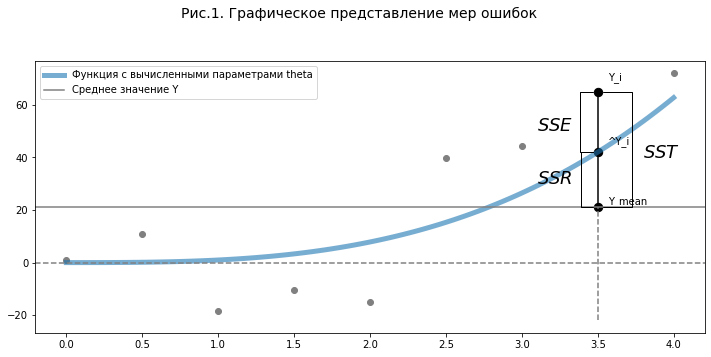

In [216]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(8)

x_true = np.linspace(0, 4, 9)
y_true = x_true**3 + np.ravel(np.random.randn(9, 1))*10

x_new = np.linspace(0, 4, 100)
y_pred = 0.98*x_new**3

fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(x_true, y_true, color='grey')
for yi, lb in zip([y_true[-2], 0.98*x_true[-2]**3, y_true.mean()], ['Y_i', '^Y_i', 'Y_mean']):
    ax.scatter(x_true[-2], yi, color='black', s=70, alpha=1)
    ax.text(x_true[-2]*1.02, yi*1.07, lb)



ax.plot(x_new, y_pred, alpha=0.6, linewidth=5,  label='Функция с вычисленными параметрами theta')
ax.axhline(y=y_true.mean(), color='grey', label='Среднее значение Y')
ax.axhline(y=0, color='grey', ls='--')
ax.vlines(x=x_true[-2], ymin=-22, ymax=y_true.mean(), color='grey', linestyles='--')
ax.vlines(x=x_true[-2], ymin=y_true.mean(), ymax=y_true[-2], color='black')


ax.text(3.8, 40, "$SST$", fontsize=18)
ax.text(3.1, 50, "$SSE$", fontsize=18)
ax.text(3.1, 30, "$SSR$", fontsize=18)

for yi1, yi2 in zip([y_true[-2], 0.98*x_true[-2]**3, y_true.mean()], [y_true.mean(), y_true[-2], 0.98*x_true[-2]**3]):
    ann = ax.annotate('', xy=(x_true[-2],yi1), xycoords='data',
                      xytext=(x_true[-2], yi2), textcoords='data',
                      arrowprops=dict(arrowstyle="-",
                                      connectionstyle="bar",
                                      ec="k",
                                      shrinkA=5, shrinkB=5))

fig.suptitle("Рис.1. Графическое представление мер ошибок", \
            fontsize = 14, y = 1.03)
plt.legend()
plt.show()

__Наша задача при обучении модели - подобрать такие $\theta$, при которых MSE, RMSE или другая выбранная нами функция ошибок, была минимальна.__

__Для нахождения такого $\theta$ можем аналитически решить уравнение, которое называется *нормальным уравнением*__.

#### Аналитическое решение:

(15) $$\hat{\theta} = (X^T X)^{-1}  X^T y$$

Где:

$\hat{\theta}$ - *наилучший* вектор весов $\theta$, т.е. обеспечивающий минимальное значение функции потерь;

$X$ - матрица из векторов значений признаков (наблюдений) размера $n$ строк (по числу наблюдений) и (m+1) столбцов (по числу коэффициентов для признаков, включая свободный член);

$X^T$ - та же матрица, только транспонированная (строки становятся столбцами);

$(X^T X)^{-1}$ - обратная произведению $X$ и $X^T$ матрица;

$y$ - вектор значений целевой переменной из обучающей выборки ("реальных" значений, которые нумеруются от $i=1$ до $i=n$).

`Вопрос:` __Можем ди мы быть уверены, что найденные таким образом коэфиициенты $\theta$ являются лучшими из возможных?__

__Математики Гаусс и Марков говорят - да.__

### Теорема Гаусса-Маркова

__Теорема Гаусса—Маркова гласит:__

Модель данных правильно специфицирована, если данные обладают следующими свойствами:

1. Все $X_k$ детерминированы и не все равны между собой (матрица $X$ - детерминированная, в ней содержатся реально проведенные наблюдения - векторы $X_k$);

2. Ошибки модели не носят систематического характера, то есть мат.ожидание ошибок модели $M[u]=0$, дисперсия ошибок модели постоянна и равна $Var[u]=\sigma^2$ ;

3. Ошибки некоррелированы, то есть $M[u_i, u_j]=0$ при $i$ не равном $j$ (попарная корреляция равна нулю).

__Тогда в этих условиях оценки метода наименьших квадратов оптимальны в классе линейных несмещённых оценок, иными словами $\hat{\theta} = (X^T X)^{-1}  X^T y$ является лучшей оценкой из возможных.__

`Примечание:` далее мы найдем коэффициенты $\theta$ для модели и проверим результат с помощью теоремы Гаусса-Маркова.

__Практическая реализация линейной регрессии:__

В практической части данной работы мы готовили датасет с погодными данными. Будем учить модели на данных о температуре, влажности и предсказывать процент облачности.

In [217]:
# Импортируем необходимые инструменты
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import re
import random
from collections import Counter
import time
from datetime import timedelta
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler


In [218]:
# прочитаем датафрейм из файла
data = pd.read_excel("data_1.xlsx")
del data['Unnamed: 0']
data.head()

,Date,Bar,Temp_Out,Out_Hum,Wind_Speed,Wind_Chill,Dew_Pt,Heat_Index,Hi_Temp,Hi_Speed,Low_Temp,Wind_Dir,Rain,Moon_illumination,Total_snow,UV_index,Cloudcover,WindGustKmph,Visibility
0,2014-03-01,766.362600,3.0,93.000,2.430556,0.625,2.000,2.875,6.0,4.166667,1.0,SE,0.2,0,0.0,1,41.625,4.236111,7.375
1,2014-03-02,763.172550,4.0,76.125,5.937500,-0.125,0.000,4.125,9.0,8.055556,1.0,ESE,0.0,2,0.0,1,22.250,9.201389,10.000
2,2014-03-03,759.513375,4.0,80.125,6.597222,-0.625,0.875,4.250,8.0,7.777778,1.0,ESE,0.2,9,0.0,1,63.500,9.618056,10.000
3,2014-03-04,758.012175,6.0,82.750,5.694444,2.000,3.125,5.875,10.0,7.222222,4.0,ESE,0.2,16,0.0,1,79.875,8.333333,9.375
4,2014-03-05,761.296050,6.0,89.250,2.118056,4.875,4.500,6.250,9.0,5.277778,5.0,ESE,0.8,24,0.0,1,81.125,3.645833,8.000


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 19 columns):
Date                 2133 non-null datetime64[ns]
Bar                  2133 non-null float64
Temp_Out             2133 non-null float64
Out_Hum              2133 non-null float64
Wind_Speed           2133 non-null float64
Wind_Chill           2133 non-null float64
Dew_Pt               2133 non-null float64
Heat_Index           2133 non-null float64
Hi_Temp              2133 non-null float64
Hi_Speed             2133 non-null float64
Low_Temp             2133 non-null float64
Wind_Dir             2133 non-null object
Rain                 2133 non-null float64
Moon_illumination    2133 non-null int64
Total_snow           2133 non-null float64
UV_index             2133 non-null int64
Cloudcover           2133 non-null float64
WindGustKmph         2133 non-null float64
Visibility           2133 non-null float64
dtypes: datetime64[ns](1), float64(15), int64(2), object(1)
memory usage: 

In [220]:
# с помощью утилиты train_test_split разделим данные на обучающий и тестовый наборы.
from sklearn.model_selection import train_test_split

X = np.array(data[['Out_Hum', 'Temp_Out']])
y = np.array(data['Cloudcover'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [221]:
# сразу шкалируем данные, т.к. температура измеряется в градусах (десятки), давление в мм.рт.ст(сотни), облачность в процентах (сотые)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = StandardScaler().fit_transform(y_train.reshape(-1,1))
y_test = StandardScaler().fit_transform(y_test.reshape(-1,1))

''

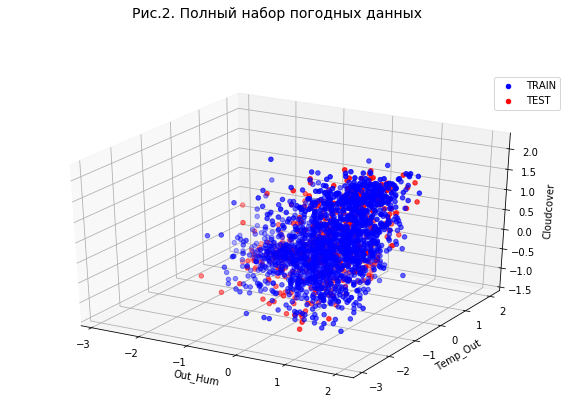

In [222]:
# взглянем на данные
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0], X_train[:,1], y_train, c='blue', label='TRAIN')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red', label='TEST')
fig.suptitle("Рис.2. Полный набор погодных данных", \
            fontsize = 14, y = 1.03)
ax.set_xlabel('Out_Hum')
ax.set_ylabel('Temp_Out')
ax.set_zlabel('Cloudcover')
ax.legend()
;

In [223]:
# добавляем слева к матрице с наблюдениями столбец с единицами (на 1 будет умножаться параметр тета нулевое)
X_train_with_c = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
theta_best_analytic = np.linalg.inv(X_train_with_c.T.dot(X_train_with_c)).dot(X_train_with_c.T).dot(y_train)
theta_best_analytic

array([[-2.25514052e-16],
       [ 5.91806156e-01],
       [-1.23009102e-01]])

`Комментарий`: Мы получили некие значения коэффициентов $\theta$, но понимаем, что они получены на данных, в которых есть шум.

Теперь можно нашу обученную модель использовать для прогнозов. Возьмем точки из тестового набора и сделаем прогноз.

In [224]:
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = X_test_with_c.dot(theta_best_analytic)

Сравним полученный результат (y_pred) с реальными данными (y_test).

Измерим показатель RMSE для собственной реализации:

In [225]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.5256043358174307

Сравним нашу реализацию алгоритма с реализованным в sklearn методом LinearRegression

In [226]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Измерим показатель RMSE для sklearn:

In [227]:
mean_squared_error(y_test, lr.predict(X_test))

0.5256043358174304

`Вывод:` результаты практически идентичны!

У такого метода (вычисление коэффициентов путем решения нормального уравнения) есть один недостаток: при большом количестве признаков вычислительная сложность достигает $O(n^3)$. Поэтому мы не будем применять этот подход на полном датасете с погодными данными, где предполагается до 800+ предикторов.

Поэтому для реальных задач с сотнями и тысячами фичей применяют подход с итеративной оптимизацией параметров - Градиентный спуск.

#### Проверка модели линейной регрессии на соответствие критериям теоремы Гаусса-Маркова:

Модель данных правильно специфицирована, если данные обладают следующими свойствами:

1. Все $X_k$ детерминированы и не все равны между собой (матрица $X$ - детерминированная, в ней содержатся реально проведенные наблюдения - векторы $X_k$);

2. Ошибки модели не носят систематического характера, то есть мат.ожидание ошибок модели $M[u]=0$, дисперсия ошибок модели постоянна и равна $Var[u]=\sigma^2$ ;

3. Ошибки некоррелированы, то есть $M[u_i, u_j]=0$ при $i$ не равном $j$ (попарная корреляция равна нулю).

__Тогда в этих условиях оценки метода наименьших квадратов оптимальны в классе линейных несмещённых оценок, иными словами $\hat{\theta} = (X^T X)^{-1}  X^T y$ является лучшей оценкой из возможных.__

__Условие 1. Выполняется. Наблюдения получены с метеостанций.__

__Условие 2. Выполняется. Матожидание ошибки равно 0, дисперсия постоянна.__

In [228]:
# матожидание ошибки
MU = np.round(np.sum((y_test - y_pred))/y_test.shape[0], 5)
MU

0.0

In [229]:
# дисперсия ошибки
VAR = ((y_test - y_pred) - np.mean(y_test - y_pred)).mean()
VAR

9.360194118619586e-18

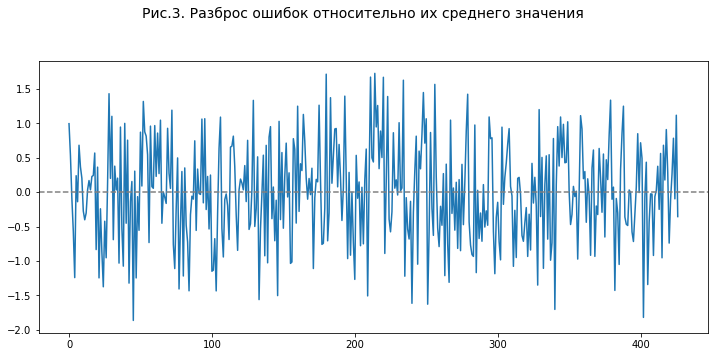

In [230]:
# дисперсия ошибки в целом постоянна
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(((y_test - y_pred) - np.mean(y_test - y_pred)))
fig.suptitle("Рис.3. Разброс ошибок относительно их среднего значения", \
            fontsize = 14, y = 1.03)
ax.axhline(y=MU, color='grey', ls='--');

__Условие 3. Выполняется. Корреляция ошибок близка к нулю.__

Напишем функцию, которая по многу разу будет брать пары из массива с ошибками и в конце посчитает матожидание.

In [231]:
def sample_corr(arr, it=10000):
    arr = arr.reshape(-1,1)
    val_list = []
    for iti in range(it):
        random_index = list(set(np.random.randint(arr.shape[0], size=2)))
        val_list.append(np.sum(arr[random_index, :]))
        
    return np.mean(val_list)

In [232]:
sample_corr((y_test - y_pred))

-0.004504570104876879

`Комментарий:` *ошибки, взятые попарно в количестве 10 000 пар "аннигилируют" друг с другом и в итоге среднее значение ошибок близко к нулю.*

### Градиентный спуск

__Принцип метода градиентного спуска заключается в передвижении по функции с какой-то случайной точки в направлении антиградиента. При этом очень важен размер шага (learning rate), который если слишком велик, не даст нам шагнуть в минимум, а если слишком мал - будем очень долго спускаться в минимум.__

__Если признаки имеют разный масштаб, то алгоритм может сходиться медленно. Рекомендуется перед применением градиентного спуска шкалировать данные.__

#### Пакетный градиентный спуск

Чтобы реализовать градиентный спуск в случае функции с количеством параметров $\theta$ $i$>=2, понадобится вычислить градиент (вектор частных производных по каждому параметру $\theta_i$. Градиент показывает, как сильно меняется функция (растет или убывает) при небольшом шаге по всем $\theta$.

Для функции потерь MSE частная производная по $\theta_i$ будет выглядеть так:

(16) $$MSE(X,h_\theta)_i' = \frac{d}{d\theta_i} MSE(X,h_\theta) = 
(\frac{1}{n}\sum_{k=1}^n (h_\theta(X_k) - y_k)^2)' =  (\frac{1}{n}\sum_{k=1}^n (\theta^T X_k - y_k)^2)' = 
\frac{2}{n}\sum_{k=1}^n (\theta^T X_k - y_k) \sum_{k=1}^m x_{i}^{(k)}$$ 

__Градиент (матрица частных производных функции потерь по каждому параметру от $\theta_0$ до $\theta_i$) функции потерь $MSE$ будет выглядеть так:__

(17)

$$
grad_\theta MSE(X,h_\theta) = 
\left(\begin{array}{cc} 
\frac{d}{d\theta_0} MSE(X,h_\theta) \\
\frac{d}{d\theta_1} MSE(X,h_\theta) \\
... \\
\frac{d}{d\theta_i} MSE(X,h_\theta) \\
... \\
\frac{d}{d\theta_m} MSE(X,h_\theta)
\end{array}\right)
= \frac{2}{n} X^T (X  \theta^T - y)
$$ 

Алгоритм называется __*пакетным градиентным спуском*__, потому что на каждом шаге он работает с полным пакетом обучающих данных. Для реальных наборов данных такой алгоритм будет работать довольно медленно.

Вычислив градиент (направление максимального роста функции), мы должны делать "шаг" в противоположном направлении (вдоль антиградиента).
При первом шаге из случайно инициализированных параметров $\theta$ мы вычитаем полученный градиент и обновляем значения коэффициентов в векторе $\theta$, при последующих - вычитаем из самого последнего вектора $\theta$ последний вычисленный градиент, и так много-много раз. Чтобы как-то нормировать шаг, нам необходимо ввести 
еще один коэффициент - $\mu$, на который будем умножать градиент. Параметр $\mu$ называется __скоростью обучения (learning rate)__.

__Вычисление очередного шага градиентного спуска:__

(18) $$\theta^{next} = \theta^{current} - \mu grad_\theta MSE(X,h_{\theta^{current}})$$

Где:

$\theta^{current}$ - текущее значение вектора коэффициентов $\theta$;

$\theta^{next}$ - следующее значение вектора коэффициентов $\theta$;

$MSE(X,h_{\theta^{current}})$ - значение $MSE$ для функции $h$ с текущим набором коэффициентов $\theta$, которой в качестве аргумента передана матрица наблюдений $X$;

$\mu$ - скорость обучения.

`Преимущества`: алгоритм позволяет находить параметры не только в случае линейной регрессии (для которой можно эти параметры найти аналитически), но и для многих других моделей, включая нейронные сети. Это преимущество относится ко всем перечисленным в данной работе вариантам реализации метода градиентного спуска.

`Недостатки`: требуется осторожно подбирать скорость обучения, для лучшей сходимости требуется шкалировать данные перед применением алгоритма. Оба последних недостатка относятся ко всем перечисленным в данной работе вариантам реализации метода градиентного спуска

__Теперь проверим на практике этот алгоритм. Учебные данные мы уже создали. Напишем функцию для градиентного спуска и затем сгенерируем новые точки и сделаем прогноз.__

In [233]:
def gradient_descent(mu, x, y, params, numIterations, lf='MSE', prnt=False):
    """
    Функция реализует алгоритм пакетного градиентного спуска. 
    mu - скорость обучения (learning rate)
    params - количество параметров, включая свободный параметр
    numIterations - количество итераций (int)
    prnt - печатать или нет вычисления, если prnt=True , то на каждом сотом шаге выводится значение функции потерь
    lf - функция потерь (loss function),по умолчанию 'MSE', можно выбрать 'MAE'
    """
    
    n = x.shape[0] #количество наблюдений в выборке
    theta = np.ones(params).reshape(params,1) # [ 1.  1. 1.] - начальные значения коэффициентов пусть будут равны 1
    x_transpose = x.transpose() # транспонированная матрица x
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        loss = hypothesis - y.reshape(len(y),1) # значение остатка
        
        if lf=='MSE':
            J = np.sum(loss ** 2) / n  # функция потерь (квадраты)
            if prnt and (iter % 10000)==0:
                print( "iter %s | MSE: %.3f" % (iter, J) )
        
        elif lf=='MAE':
            J = np.sum(abs(loss)) / n  # функция потерь (модули)
            if prnt and (iter % 10000)==0:
                print( "iter %s | MAE: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) * 2 / n         
        theta = theta - mu * gradient  # update
    
    return (theta)

In [234]:
%%time
# добавляем слева к матрице с наблюдениями столбец с единицами (на 1 будет умножаться параметр тета нулевое)
X_train_with_c = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
# запускаем алгоритм градиентного спуска

theta_best_gd = gradient_descent(0.0001, X_train_with_c, y_train, params=X_train_with_c.shape[1], numIterations=100000, lf='MSE', prnt=True)

iter 0 | MSE: 2.329
iter 10000 | MSE: 0.658
iter 20000 | MSE: 0.565
iter 30000 | MSE: 0.543
iter 40000 | MSE: 0.537
iter 50000 | MSE: 0.535
iter 60000 | MSE: 0.534
iter 70000 | MSE: 0.534
iter 80000 | MSE: 0.534
iter 90000 | MSE: 0.534
Wall time: 6.97 s


In [235]:
# полученные параметры (градиентный спуск)
np.round(theta_best_gd, 3)

array([[ 0.   ],
       [ 0.593],
       [-0.121]])

In [236]:
# полученные параметры (аналитическое решение)
np.round(theta_best_analytic, 3)

array([[-0.   ],
       [ 0.592],
       [-0.123]])

`Комментарий:` Полученные параметры очень близки к тем, которые мы получили аналитическим способом.

In [237]:
# возьмем новые точки из test выборки и применим для вычисления значения функции по ним коэффициенты, 
# полученные нашим алгоритмом градиентного спуска
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
y_pred_gd = X_test_with_c.dot(theta_best_gd)

Показатель RMSE также очень близок к результату нашего аналитического решения и sklearn (что логично):

In [238]:
mean_squared_error(y_test, y_pred_gd)

0.5254486822976137

### Стохастический градиентный спуск

Данная модификация алгоритма позволяет обойти проблему, которой страдает пакетный метод, а именно - необходимость работать со всем набором обучающих данных.
Стохастический градиентный спуск на каждом шаге выбирает из обучающего набора один случайный образец и вычисляет градиент только на основе этого образца.
Это сильно повышает скорость работы, но вместо поступательного движения к минимуму функции потерь мы будем наблюдать блуждание показателя функции потерь, который будет убывать лишь в среднем.
Достигнув минимума, алгоритм продолжит "метаться"в его окрестностях. Т.о. конечные значения параметров $\theta$ будут хорошими, но не оптимальными. 

`Преимущества`: алгоритм вычислительно дешевле, чем пакетный вариант, быстро дает хорошие результаты, в случае нерегулярной функции потерь (с множеством локальных экстремумов) у алгоритма хорошие шансы выскочить из локального минимума и добраться до более глубокого локального минимума или даже до глобального. 

`Недостатки`: итоговый ответ не будет оптимальным (алгоритм не остановится, даже если попадет в минимум), он будет скорее всего просто "хорошим".

Одним из решений последнего недостатка является постепенное снижение ___скорости обучения (learning rate)___. Такой подход называется ___имитацией отжига (simulated annealing)___. Специальная функция, отвечающая за изменение скорости обучения, называется ___графиком обучения (learning schedule)___. Как и с подбором learning rate нет точного ответа, каким его выставить, так и со скоростью снижения learning rate нужно быть аккуратным, чтобы не остановиться раньше времени или не перепрыгнуть глобальный минимум.

In [239]:
def learning_schedule(val, p1=100, p2=50):
    """Функция принимает в качестве аргументов параметры
    p1 - параметр для числителя (по умолчанию равен 100), 
    p2 - параметр для знаменателя(по умолчанию равен 50), 
    val - значение, которое задается пользователем
    и возвращает простое преобразование
    return p1/(p2 + val)
    """
    return p1/(p2 + val)

In [240]:
def st_gradient_descent(x, y, params, num_epochs, num_iter, lf='MSE', prnt=False):
    """
    Функция реализует алгоритм стохастического градиентного спуска. 
    mu - скорость обучения (learning rate)
    params - количество параметров, включая свободный параметр
    num_epochs - количество эпох
    num_iter - количество итераций (int) в эпохе
    prnt - печатать или нет вычисления каждые 100 итераций
    lf - функция потерь (loss function),по умолчанию 'MSE', можно выбрать 'MAE'
    Без функции learning_schedule() работать не будет.
    """
    
    n = x.shape[0] #количество наблюдений в выборке
    theta = np.ones(params).reshape(params,1) # [ 1.  1.  1.] - начальные значения коэффициентов пусть будут равны 1
    y = y.reshape(-1,1)
    lr=0.0001
    for epoch in range(num_epochs):
        for iteration in range(num_iter):
            random_index = np.random.randint(n)
            x_rand = x[random_index, :].reshape(1, params)
            y_rand = y[random_index, :]

            hypothesis = np.dot(x_rand, theta) # матричное произведение
            loss = hypothesis - y_rand.reshape(-1,1) # значение остатка

            if lf=='MSE':
                J = np.sum(loss ** 2) / n  # функция потерь (квадраты)
                if prnt and (iteration % 10000)==0:
                    print( "epoch %s | iter %s | MSE: %.3f" % (epoch, iteration, J) )

            elif lf=='MAE':
                J = np.sum(abs(loss)) / n  # функция потерь (модули)
                if prnt and (iteration % 10000)==0:
                    print( "iter %s | MAE: %.3f" % (iteration, J) )

            gradient = np.dot(x_rand.transpose(), loss) * 2 / n  
            lr = learning_schedule(val=100, p1=1, p2=10000)
            
            theta = theta - lr * gradient  # update
    
    return (theta)

Запустим наш алгоритм на 50 эпох по 2000 итераций (всего 100000 раз) и замерим время выполнения.

In [241]:
%%time
theta_best_sgd = st_gradient_descent(X_train_with_c, y_train, params=X_train_with_c.shape[1], num_epochs=50, num_iter=2000, lf='MSE', prnt=True)
theta_best_sgd

epoch 0 | iter 0 | MSE: 0.001
epoch 1 | iter 0 | MSE: 0.001
epoch 2 | iter 0 | MSE: 0.000
epoch 3 | iter 0 | MSE: 0.002
epoch 4 | iter 0 | MSE: 0.000
epoch 5 | iter 0 | MSE: 0.006
epoch 6 | iter 0 | MSE: 0.001
epoch 7 | iter 0 | MSE: 0.002
epoch 8 | iter 0 | MSE: 0.001
epoch 9 | iter 0 | MSE: 0.000
epoch 10 | iter 0 | MSE: 0.000
epoch 11 | iter 0 | MSE: 0.000
epoch 12 | iter 0 | MSE: 0.000
epoch 13 | iter 0 | MSE: 0.001
epoch 14 | iter 0 | MSE: 0.000
epoch 15 | iter 0 | MSE: 0.002
epoch 16 | iter 0 | MSE: 0.000
epoch 17 | iter 0 | MSE: 0.002
epoch 18 | iter 0 | MSE: 0.001
epoch 19 | iter 0 | MSE: 0.001
epoch 20 | iter 0 | MSE: 0.000
epoch 21 | iter 0 | MSE: 0.001
epoch 22 | iter 0 | MSE: 0.000
epoch 23 | iter 0 | MSE: 0.004
epoch 24 | iter 0 | MSE: 0.003
epoch 25 | iter 0 | MSE: 0.003
epoch 26 | iter 0 | MSE: 0.001
epoch 27 | iter 0 | MSE: 0.003
epoch 28 | iter 0 | MSE: 0.002
epoch 29 | iter 0 | MSE: 0.000
epoch 30 | iter 0 | MSE: 0.000
epoch 31 | iter 0 | MSE: 0.000
epoch 32 | iter 0 

array([[0.98850809],
       [1.00419612],
       [0.99031608]])

In [242]:
np.round(theta_best_gd, 3)

array([[ 0.   ],
       [ 0.593],
       [-0.121]])

In [243]:
np.round(theta_best_sgd, 3)

array([[0.989],
       [1.004],
       [0.99 ]])

`Комментарий:` как показал замер по времени, стохастический градиентный спуск работает быстрее, чем пакетный. Обе реализации в приведенных примерах 100 000 раз совершили обновление параметров $\theta$. Однако, полученный результат кажется очень далек от найденного аналитически и с помощью пакетного градиентного спуска.

Сравним с аналогичным методом из библиотеки sklearn:

In [244]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100000, penalty=None, eta0=0.1, random_state=42)

In [245]:
%%time
sgd_reg.fit(X_train_with_c, y_train.ravel())

Wall time: 4 ms


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [246]:
print('Параметры, которые вернул SGDRegressor из библиотеки sklearn:')
theta_best_sgd_sklearn = np.array([[sgd_reg.coef_[0]],
                                   [sgd_reg.coef_[1]],
                                   [sgd_reg.coef_[2]]])
np.round(theta_best_sgd_sklearn, 3)

Параметры, которые вернул SGDRegressor из библиотеки sklearn:


array([[-0.037],
       [ 0.549],
       [-0.084]])

`Комментарий:` реализация sklearn намного эффективнее работает по скорости вычислений и по точности (параметр RMSE).

### Мини-пакетный градиентный спуск

Данная модификация алгоритма сочетает в себе особенности пакетного и стохастического варианта реализации.
Мини-пакетный градиентный спуск вычисляет градиенты на небольших случайно отбираемых семплах данных (__mini-batch__).
Чем крупнее пакет, тем меньше блуждание алгоритма относительно кратчайшего пути от начальной точки к локальному минимуму.
Мини-пакетный градиентый спуск в общем случае подбирается ближе к минимуму, чем стохастический вариант.
С другой стороны данному алгоритму сложнее уйти от локальных минимумов, особенно, когда их много.
При условии хорошо подобранного графика обучения метод мини-пакетного градиентного спуска позволяет достичь минимума быстрее, чем пакетный вариант.

`Преимущества`: алгоритм вычислительно дешевле, чем пакетный вариант, быстро дает хорошие результаты, в случае нерегулярной функции потерь (с множеством локальных экстремумов) у алгоритма хорошие шансы выскочить из локального минимума и добраться до более глубокого локального минимума или даже до глобального.

`Недостатки`: итоговый ответ не будет оптимальным (алгоритм не остановится, даже если попадет в минимум), он будет скорее всего просто "хорошим".

Напишем собственную реализацию алгоритма.

In [247]:
def mb_gradient_descent(x, y, mu, params, num_epochs, num_iter, batch_size=0.2, lf='MSE', prnt=False):
    """
    Функция реализует алгоритм мини-пакетного градиентного спуска. 
    mu - скорость обучения (learning rate)
    params - количество параметров, включая свободный параметр
    num_iter - количество итераций (int) в эпохе
    batch_size - размер пакета для одной итерации
    prnt - печатать или нет вычисления
    lf - функция потерь (loss function),по умолчанию 'MSE', можно выбрать 'MAE'
    """
    
    n = x.shape[0] #количество наблюдений в выборке
    theta = np.ones(params).reshape(params,1) # [ 1.  1.  1.] - начальные значения коэффициентов пусть будут равны 1
    y = y.reshape(-1,1)
    
    for epoch in range(num_epochs):
        for iteration in range(num_iter):
            random_index = list(set(np.random.randint(200, size=round(n*batch_size)).tolist()))
            x_rand = x[random_index, :].reshape(len(random_index), params)
            y_rand = y[random_index, :]

            hypothesis = np.dot(x_rand, theta) # матричное произведение
            loss = hypothesis - y_rand # значение остатка

            if lf=='MSE':
                J = np.sum(loss ** 2) / n  # функция потерь (квадраты)
                if prnt and (iteration % 10000)==0:
                    print( "epoch %s | iter %s | MSE: %.3f" % (epoch, iteration, J) )

            elif lf=='MAE':
                J = np.sum(abs(loss)) / n  # функция потерь (модули)
                if prnt and (iteration % 10000)==0:
                    print( "iter %s | MAE: %.3f" % (iteration, J) )

            gradient = np.dot(x_rand.transpose(), loss) * 2 / n  
            theta = theta - mu * gradient  # update
    
    return (theta)

Запустим наш алгоритм на 50 эпох по 2000 итераций (всего 100000 раз) и замерим время выполнения.

In [248]:
%%time
theta_best_mbgs = mb_gradient_descent(X_train_with_c, y_train, mu=0.001, params=X_train_with_c.shape[1], num_epochs=50, num_iter=2000, batch_size=0.2, lf='MSE', prnt=True)
theta_best_mbgs

epoch 0 | iter 0 | MSE: 0.228
epoch 1 | iter 0 | MSE: 0.124
epoch 2 | iter 0 | MSE: 0.089
epoch 3 | iter 0 | MSE: 0.073
epoch 4 | iter 0 | MSE: 0.059
epoch 5 | iter 0 | MSE: 0.058
epoch 6 | iter 0 | MSE: 0.054
epoch 7 | iter 0 | MSE: 0.052
epoch 8 | iter 0 | MSE: 0.048
epoch 9 | iter 0 | MSE: 0.055
epoch 10 | iter 0 | MSE: 0.048
epoch 11 | iter 0 | MSE: 0.046
epoch 12 | iter 0 | MSE: 0.044
epoch 13 | iter 0 | MSE: 0.043
epoch 14 | iter 0 | MSE: 0.045
epoch 15 | iter 0 | MSE: 0.048
epoch 16 | iter 0 | MSE: 0.044
epoch 17 | iter 0 | MSE: 0.046
epoch 18 | iter 0 | MSE: 0.041
epoch 19 | iter 0 | MSE: 0.045
epoch 20 | iter 0 | MSE: 0.048
epoch 21 | iter 0 | MSE: 0.048
epoch 22 | iter 0 | MSE: 0.047
epoch 23 | iter 0 | MSE: 0.046
epoch 24 | iter 0 | MSE: 0.046
epoch 25 | iter 0 | MSE: 0.041
epoch 26 | iter 0 | MSE: 0.044
epoch 27 | iter 0 | MSE: 0.048
epoch 28 | iter 0 | MSE: 0.048
epoch 29 | iter 0 | MSE: 0.048
epoch 30 | iter 0 | MSE: 0.043
epoch 31 | iter 0 | MSE: 0.045
epoch 32 | iter 0 

array([[ 0.04082631],
       [ 0.64374846],
       [-0.10886436]])

In [249]:
np.round(theta_best_mbgs, 3)

array([[ 0.041],
       [ 0.644],
       [-0.109]])

In [250]:
np.round(theta_best_analytic, 3)

array([[-0.   ],
       [ 0.592],
       [-0.123]])

Результаты близки к искомым.

Чтобы использовать мини-пакетный градиентный спуск в sklearn, нужно специально настраивать SGDRegressor(). Делать этого в данном случае не будем.

### Полиномиальная регрессия

Для случаев, когда данные измерений не могут быть описаны линейно, есть способ тем не менее использовать линейную регрессию. Например, добавить в качестве признаков значения степеней каждого из изначальных признаков, и на таком расширенном наборе обучить линейную регрессию. Такой подход и называется __полиномиальной регрессией__. По сути, линейная регрессия является частным случаем полиномиальной.

Иными словами, такой метод переводит значения признаков в пространство более высокой размерности, в котором уже предпринимается попытка провести прямую (гиперплоскость в многомерном случае) так, чтобы функция потерь была минимальна (собственно, применить линейную регрессию). 

Общее количество признаков (изначальные + новые признаки) может увеличиваться взрывным образом при большом количестве изначальных признаков и высокой степени, в которую мы хотим возвести значения изначальных признаков (выбирается исследователем на свое усмотрение, начиная со степени 2). Формула, которая описывает увеличение количества признаков:

(19) $$n_{poly} = \frac{(n+d)!}{n!d!}$$

Где:

$n_{poly}$ -новое количество признаков после применения алгоритма;

$n$ - изначальное количество признаков в наборе;

$d$ - максимальная степень полинома.

Например: 

при наличии одного признака $x_1$ и степени d=2 количество признаков составит:

$\frac{(1+2)!}{1!2!}=\frac{6}{2}=3$ , а именно: $x_1$, $x_1^2$, $x_1  x_1^2$
    
при наличии двух признаков $x_1$ и $x_2$ и степени d=2 количество признаков составит:

$\frac{(2+2)!}{2!2!}=\frac{12}{2}=6$ , а именно: $x_1$, $x_2$, $x_1 x_2^2$, $x_1^2 x_2$, $x_1^2$, $x_2^2$

`Примечание`: при проверке на практике есть нюанс - новый набор признаков может включать одинаковые признаки (повторы, которые не имеет смысла использовать), поэтому после удаления таких дублей получаемое количество признаков может быть меньше, чем теоретически вычисленное по формуле (19).

`Преимущества`: позволяет аппроксимировать данные, распределенные нелинейно.

`Недостатки`: взрывной рост количествановых признаков при высоких степенях и большом количестве изначальных признаков, что может сделать вычисления "дорогими".

Возьмем самый простой пример: одномерные данные для наблюдений:

In [251]:
x1_train = X_train[:,0].reshape(-1,1)
x1_test = X_test[:,0].reshape(-1,1)

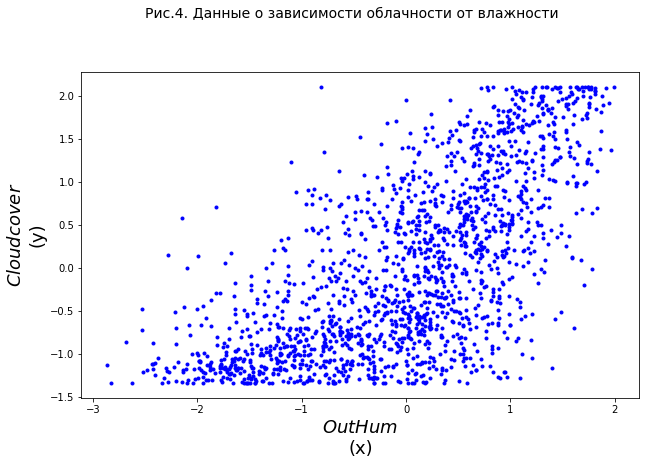

In [252]:
# визуализируем точки

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.plot(x1_train, y_train, "b.")
plt.xlabel("$Out Hum$ \n(x)", fontsize=18)
plt.ylabel("$Cloudcover$ \n(y)", fontsize=18)
fig.suptitle("Рис.4. Данные о зависимости облачности от влажности", \
            fontsize = 14, y = 1.03)
plt.show();

Напишем функцию, способную обработать простой случай для полинома 2-го порядка:

In [253]:
def pol_features(x_arr, add_c=True):
    """Функция принимает на вход массив (x_arr), 
    если add_c=True, добавляет слева столбец единиц (для дальнейшего умножения кэффициента свободного члена на 1),
    берет все столбцы (включая столбец из единиц) и возводит их в квадрат, 
    а также перемножает попарно столбцы, возведенные в квадрат, с первоначальными столбцами.
    Всего из n столбцов получается (n+2)!/(n!2!) столбцов. Часть из них будут идентичными.
    Если del_ununique=True, то удаляет дублирующие столбцы.
    Возвращает этот результат.
    ФУНКЦИЯ РАБОТАЕТ ТОЛЬКО ДЛЯ СТЕПЕНИ ПОЛИНОМА РАВНО 2 !
    """
    import itertools
    import numpy as np
    
    
    # сохраняем в список номера столбцов
    col_num = [num for num in range(x_arr.shape[1])]
    # в список permuts_same сохраняем в виде кортежей пары из одинаковых номеров столбцов (0,0), (1,1) и т.д.
    permuts_same = [(i[0], i[0]) for i in list(itertools.permutations(col_num, 1))]
    # в список permuts_diff сохраняем в виде кортежей пары из не одинаковых номеров столбцов (1,0), (0,1) и т.д.
    permuts_diff = [i for i in list(itertools.permutations(col_num, 2))]
    
    # копируем первоначальный массив
    new_arr = x_arr.copy()
    # бежим по permuts_same и возводим колонки в квадрат
    for ps in permuts_same:
        new_col = (x_arr[:,ps[0]]**2).reshape(x_arr.shape[0], 1)
        # присоединяем новую колонку справа к новому массиву
        new_arr = np.hstack([new_arr, new_col])
    
    # бежим по permuts_diff, возводим первую колонку из кортежа в квадрат и умножаем на вторую колонку из кортежа
    for pd in permuts_diff:
        new_col = (x_arr[:,pd[0]]**2 * x_arr[:,pd[1]]).reshape(x_arr.shape[0], 1)
        # присоединяем новую колонку справа к новому массиву
        new_arr = np.hstack([new_arr, new_col])
    
    # к получившемуся массиву добавляем столбец единиц
    if add_c:
        new_arr = np.c_[np.ones((new_arr.shape[0], 1)), new_arr]
        
    return new_arr

Проверим результат:

In [254]:
print('Функция pol_features для массива из {} \
столбца(-ов) возвращает {} столбца(-ов) (polynomial features)'.\
     format(x1_train.shape[1]+1, pol_features(x1_train).shape[1]))

Функция pol_features для массива из 2 столбца(-ов) возвращает 3 столбца(-ов) (polynomial features)


In [255]:
x1_train[:5,:]

array([[ 1.95960916],
       [-0.69475737],
       [ 0.31487898],
       [ 0.86855052],
       [ 0.98254172]])

In [256]:
x1_train_poly = pol_features(x1_train)
x1_train_poly[:5,:]

array([[ 1.        ,  1.95960916,  3.84006804],
       [ 1.        , -0.69475737,  0.48268781],
       [ 1.        ,  0.31487898,  0.09914877],
       [ 1.        ,  0.86855052,  0.75438001],
       [ 1.        ,  0.98254172,  0.96538824]])

In [257]:
x1_train_poly.shape

(1706, 3)

In [258]:
y_train.shape

(1706, 1)

In [259]:
# аналитически вычисляем коэффициенты
theta_best_poly = np.linalg.inv(x1_train_poly.T.dot(x1_train_poly)).dot(x1_train_poly.T).dot(y_train)

In [260]:
# коэффициенты идут в порядке: 
# свободный член (тета нулевое), тета первое (при икс в первой степени), тета второе (при икс в квадрате)
theta_best_poly

array([[-0.16490144],
       [ 0.73670014],
       [ 0.16490144]])

In [261]:
# проверим модель на тестовых данных. 
x1_test_poly = pol_features(x1_test)
y_pred_poly = x1_test_poly.dot(theta_best_poly)

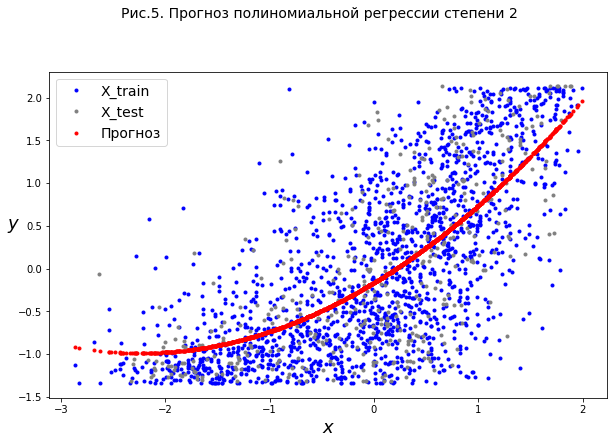

In [262]:
# визуализируем
plt.figure(figsize=(10, 6))
fig = plt.gcf()
plt.plot(x1_train, y_train, "b.", label="X_train", c='blue')
plt.plot(x1_test, y_test, "b.", label="X_test", c='grey')
plt.plot(x1_train,theta_best_poly[0]+theta_best_poly[1]*x1_train + theta_best_poly[2]*x1_train**2, "r.", label="Прогноз")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
fig.suptitle("Рис.5. Прогноз полиномиальной регрессии степени 2", \
            fontsize = 14, y = 1.03)
plt.show();

Измерим ошибку прогноза (RMSE):

In [263]:
mean_squared_error(y_test, y_pred_poly)

0.4780676842034752

Сравним с реализацией в sklearn:

In [264]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
x1_train_poly_sklearn = poly.fit_transform(x1_train)
# выведем первые 5 из 100 строчек изначального массива
x1_train[:5,:]

array([[ 1.95960916],
       [-0.69475737],
       [ 0.31487898],
       [ 0.86855052],
       [ 0.98254172]])

In [265]:
# выведем первые 5 строчек полученного массива
x1_train_poly_sklearn[:5,:]

array([[ 1.        ,  1.95960916,  3.84006804],
       [ 1.        , -0.69475737,  0.48268781],
       [ 1.        ,  0.31487898,  0.09914877],
       [ 1.        ,  0.86855052,  0.75438001],
       [ 1.        ,  0.98254172,  0.96538824]])

In [266]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1_train_poly_sklearn, y_train)
print('Значения коэффициентов, полученные с помощью sklearn LinearRegression: \n{}, \n{}, \n{}'.\
      format(lr.intercept_, lr.coef_[:,1], lr.coef_[:,2]))

Значения коэффициентов, полученные с помощью sklearn LinearRegression: 
[-0.16490144], 
[0.73670014], 
[0.16490144]


In [267]:
# проверим модель на тестовых данных (x1_test)
x1_test_poly_sklearn = poly.transform(x1_test)
y_test_poly_sklearn_pred = lr.predict(x1_test_poly_sklearn)

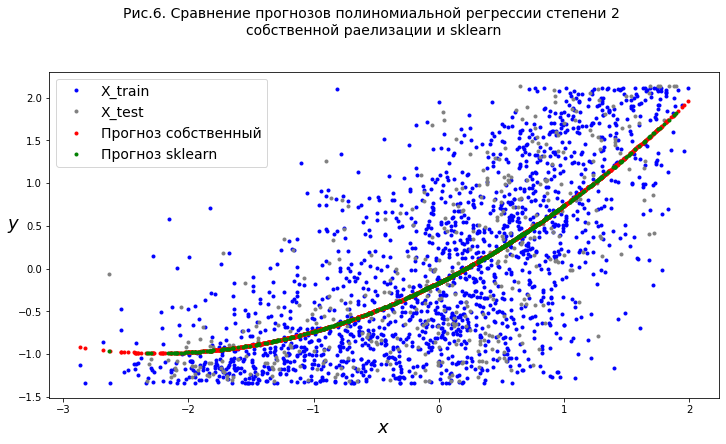

In [268]:
# визуализируем
plt.figure(figsize=(12, 6))
fig = plt.gcf()

plt.plot(x1_train, y_train, "b.", label="X_train", c='blue')
plt.plot(x1_test, y_test, "b.", label="X_test", c='grey')
plt.plot(x1_train,theta_best_poly[0]+theta_best_poly[1]*x1_train + theta_best_poly[2]*x1_train**2, "r.", label="Прогноз собственный")
plt.plot(x1_test, y_test_poly_sklearn_pred, "g.", linewidth=2, label="Прогноз sklearn")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
fig.suptitle("Рис.6. Сравнение прогнозов полиномиальной регрессии степени 2 \nсобственной раелизации и sklearn", \
            fontsize = 14, y = 1.03)
plt.show();

`Примечание:` прогноз собственный и прогноз sklearn совпадают.

Измерим ошибку прогноза (RMSE):

In [269]:
mean_squared_error(y_test, y_test_poly_sklearn_pred)

0.47806768420347506

In [270]:
# Разница в значении функции ошибки RMSE - в -дцатом знаке после запятой.
print(mean_squared_error(y_test, y_pred_poly) - mean_squared_error(y_test, y_test_poly_sklearn_pred))

1.1102230246251565e-16


#### Кривые обучения

Казалось бы, при наличии достаточных вычислительных мощностей можно смело увеличивать степень полинома и создавать много полиномиальных признаков, что позволит лучше приблизить моделью тренировочные данные. Однако в таком случае мы рискуем столкнуться с переобучением. Приведем пример:

In [271]:
# Создадим Polynomial Features со степенью degree=50
poly_50 = PolynomialFeatures(degree=50, interaction_only=False, include_bias=True)
x1_poly_50_train = poly_50.fit_transform(x1_train)
# инициализируем новую модель линейной регрессии
lr2 = LinearRegression()
# обучаем линейную регрессию на новых Polynomial Features
lr2.fit(x1_poly_50_train, y_train)
# делаем прогноз целевой переменной
y_train_poly_50_predict = lr2.predict(x1_poly_50_train)

x1_train[:5,:]

array([[ 1.95960916],
       [-0.69475737],
       [ 0.31487898],
       [ 0.86855052],
       [ 0.98254172]])

In [272]:
print('Из {} признака получили {} при значении степени degree=50.'.format(x1_train.shape[1], x1_poly_50_train.shape[1]))

Из 1 признака получили 51 при значении степени degree=50.


In [273]:
# применим полиномиальную регрессию (degree=50) для тестовых данных
x1_poly_50_test = poly_50.transform(x1_test)
y_test_poly_50_predict = lr2.predict(x1_poly_50_test)

In [274]:
theta_best_poly_sklearn = lr2.coef_
theta_best_poly_sklearn.shape

(1, 51)

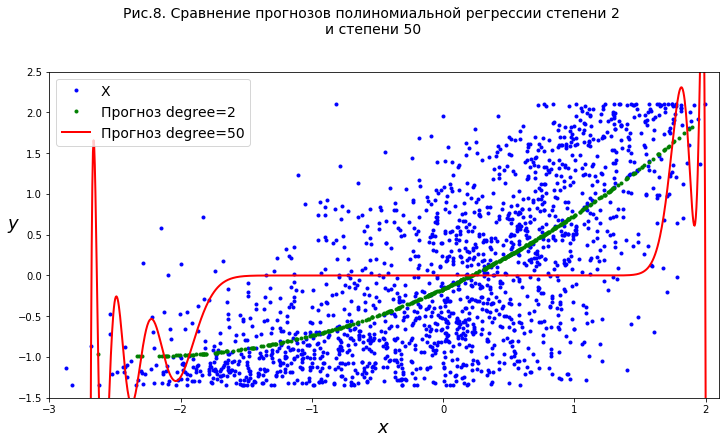

In [275]:
# визуализируем
plt.figure(figsize=(12, 6))
fig = plt.gcf()
plt.plot(x1_train, y_train, "b.", label="X")
plt.plot(x1_test, y_test_poly_sklearn_pred, "g.", linewidth=2, label="Прогноз degree=2")

# создадим новые данные для отрисовки
extra_x=np.linspace(-2.7,2,1000).reshape(-1,1)
# преобразуем их полиномом 50-й степени
extra_x_poly = poly_50.transform(extra_x)
# создадим игреки при помощи найденных коэффициентов: y^ = X * theta^.T
plt.plot(extra_x, (extra_x_poly).dot(theta_best_poly_sklearn.T), "r-", linewidth=2, label="Прогноз degree=50")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 2.1, -1.5, 2.5])
fig.suptitle("Рис.8. Сравнение прогнозов полиномиальной регрессии степени 2 \nи степени 50", \
            fontsize = 14, y = 1.03)
plt.show();

Мы видим, что квадратичная модель намного лучше обобщается, чем модель 50-й степени, которая старается "выучить" каждую конкретную точку обучающего набора данных и очевидно не сможет сделать хороший прогноз на новых данных. Посмотрим на полученные коэффициенты:

In [276]:
lr2.intercept_, lr2.coef_

(array([0.00279561]),
 array([[ 1.96143141e-11, -2.32178728e-09, -5.41678724e-10,
          4.31135537e-10, -4.86070555e-10,  1.10882748e-10,
         -5.85070030e-11,  3.39454935e-11,  9.10950893e-12,
         -5.44287640e-12, -3.83162479e-12, -9.42092749e-12,
         -1.74680039e-12, -1.02178360e-11, -5.73496102e-12,
          9.79662464e-12, -1.77047000e-11,  2.98206659e-11,
         -5.28709116e-11,  8.74487905e-11, -1.51441164e-10,
          2.44613657e-10, -4.11527206e-10,  6.44305568e-10,
         -1.04541324e-09,  1.57011909e-09, -2.43192344e-09,
          3.45073111e-09, -5.02321426e-09,  6.56999372e-09,
         -8.75570445e-09,  1.00815268e-08, -1.16634971e-08,
          1.05473160e-08, -8.97628838e-09,  3.18304123e-09,
          2.11467905e-09, -8.15581705e-09,  9.86735354e-09,
         -2.63918961e-09, -1.72509622e-09,  1.48854800e-08,
          3.75424047e-09, -8.50966822e-09, -3.76169651e-09,
          1.36683742e-09,  1.07450552e-09,  7.10853294e-11,
         -8.692726

''

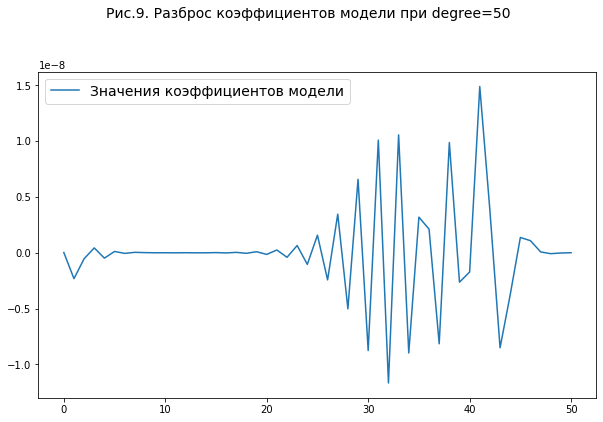

In [277]:
plt.figure(figsize=(10, 6))
fig = plt.gcf()
plt.plot(lr2.coef_.T, label="Значения коэффициентов модели")
plt.legend(loc="centre", fontsize=14)
fig.suptitle("Рис.9. Разброс коэффициентов модели при degree=50", \
            fontsize = 14, y = 1.03)
;

`Примечание:` Как правило для реальных данных мы не знаем, полиномом какой степени они описываются. Как выяснить, в какой момент при переборе вариантов сочетания коэффициентов модель недообучается, а в какой момент началось переобучение?

Ответ - построить кривую обучения.

__Кривая обучения__ - это график, отражающий зависимость размера выборки, используемой моделью для обучения, и значения функции ошибок для обучающего и тестового наборов данных.

Построим кривую обучения и проанализируем ее.

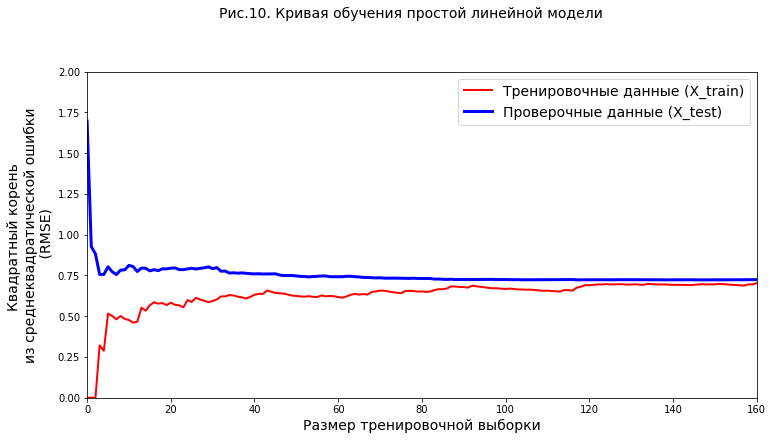

In [278]:
train_error, test_error = [], []
for sample in range(1, X_train.shape[0]):
    lr.fit(X_train[:sample], y_train[:sample])
    local_predict = lr.predict(X_train[:sample])
    global_predict = lr.predict(X_test)
    train_error.append(mean_squared_error(y_train[:sample], local_predict))
    test_error.append(mean_squared_error(y_test, global_predict))

plt.figure(figsize=(12, 6))
fig = plt.gcf()
plt.plot(np.sqrt(train_error), "r-", linewidth=2, label="Тренировочные данные (X_train)")
plt.plot(np.sqrt(test_error), "b-", linewidth=3, label="Проверочные данные (X_test)")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Размер тренировочной выборки", fontsize=14)
plt.ylabel("Квадратный корень \nиз среднеквадратической ошибки\n (RMSE)", fontsize=14)
fig.suptitle("Рис.10. Кривая обучения простой линейной модели", \
            fontsize = 14, y = 1.03)
plt.axis([0, 160, 0, 2]);   

Отметим некоторые особенности данного графика:

___Для красной линии (тренировочные данные):___

1. Значение функции ошибок при небольших размерах тренировочной выборки равны нулю. Это объясняется тем, что модель при 1,2,3 и т.д. наблюдениях еще способна подстроиться под них очень точно, т.к. пройти через все эти немногочисленные точки. Далее при увеличении размера выборки наша модель уже не в состоянии попасть во все точки, и мы наблюдаем резкий рост значения функции потерь. У модели это не получается по следующим основным причинам: смещение (системная ошибка, когда мы пытаемся прямой линией описать данные, имеющие форму параболы), дисперсия (стремление модели описать даже незначительные выбросы в данных) и шум (данные с какой-то дисперсией разбросаны вокруг "идеального" положения, это может быть вызвано различными помехами, некорректными настройками измерительного оборудования и т.д.).

2. Значение функции потерь стабилизируется в районе выше 0.6. Добавление новых обучающих данных не приводит к какому-либо существенному изменению размера ошибок.

___Для синей линии (проверочные данные):___

3. Синяя линия начинается с высоких значений функции потерь, т.к. вначале модель обучается на совсем маленьких выборках обучающих данных, а предсказания мы ее заставляем сделать по всей выборке X_test. Соответственно, модель делает очень грубые ошибки.

4. С ростом количества обучающих данных значение функции потерь стабилизируется в районе ниже 0.7 (над красной кривой). Это происходит, потому что модель получает все больше обучающих данных и точнее начинает делать прогнозы. Тем не менее, снижение функции потерь не может продолжаться постоянно и упирается в некий предел (образно говоря - потому что мы все еще продолжаем аппроксимировать некую параболу прямой линией).

___Для обеих кривых:___

5. Обе кривые стабилизируются в районе одного относительно высокого значения функции ошибки, но не пересекаются.

6. Описанный вид кривой обучения ___характерен для недообученных моделей___. В таком случае рекомендуется либо усложнить модель, либо найти другие признаки для обучения.

Теперь построим кривую обучения для другой, более сложной, модели - полиномиальной (degree=50).

Wall time: 21 s


''

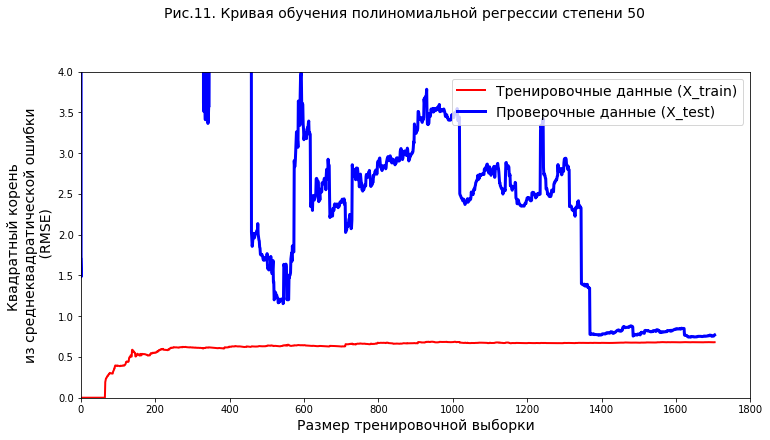

In [279]:
%%time
train_error, test_error = [], []
poly_50 = PolynomialFeatures(degree=10, interaction_only=False, include_bias=True)

for sample in range(1, X_train.shape[0]):
    X_poly_50 = poly_50.fit_transform(X_train[:sample,:])
    
    lr.fit(X_poly_50, y_train[:sample,:])
    
    local_predict = lr.predict(X_poly_50)
    global_predict = lr.predict(poly_50.fit_transform(X_test))
    
    train_error.append(mean_squared_error(y_train[:sample], local_predict))
    test_error.append(mean_squared_error(y_test, global_predict))
    
plt.figure(figsize=(12, 6))
fig = plt.gcf()

plt.plot(np.sqrt(train_error), "r-", linewidth=2, label="Тренировочные данные (X_train)")
plt.plot(np.sqrt(test_error), "b-", linewidth=3, label="Проверочные данные (X_test)")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Размер тренировочной выборки", fontsize=14)
plt.ylabel("Квадратный корень \nиз среднеквадратической ошибки\n (RMSE)", fontsize=14)
fig.suptitle("Рис.11. Кривая обучения полиномиальной регрессии степени 50", \
            fontsize = 14, y = 1.03)
plt.axis([0, 1800, 0, 4])
; 

Отметим некоторые особенности нового графика:

___Для обеих кривых:___

1. Ошибка сходится примерно к тем же значениям, что и при применении линейной модели.

2. Промежуток между двумя кривыми значительно сокращается только после 1300+ образцов. То есть до этого порогового значения образцов модель можно считать переобученной, т.к. она дает намного меньшую ошибку на тренировочных данных, чем на тестовых (там в этом месте ошибка просто катастрофическая). Таким образом напрашивается вывод: если видим, что модель переобучена на обучающих данных (если закроем часть графика справа), то следует добавить еще обучающих данных, чтобы модель начала лучше обобщать новые получаемые данные.

## Линейные регрессионные модели с регуляризацией

__Регуляризация__ - это наложение на модель определенных ограничений для того, чтобы избежать переобучения.

Самый простой пример регуляризации - использовать при генерации полиномиальных признаков не 10-ю степень полинома, а 2-ю.
Кроме того, можно искусственно ограничить размер коэффициентов $\theta$ модели.

К числу регуляризованных регрессионных моделей относятся:
    
* Гребневая-регрессия ($L_2$-регуляризация)
* Лассо-регрессия ($L_1$-регуляризация)
* Эластичная сеть

### Гребневая-регрессия ($L_2$-регуляризация, регуляризация Тихонова)

Регуляризация модели реализуется за счет добавления к функции потерь *члена регуляризации* (20):

(20) $$\alpha \sum_{i=1}^m \theta_i^2$$

Где:

$\alpha$ - нормировочный параметр, определяет, как сильно мы регуляризуем модель. При $\alpha = 0$ гребневая регрессия становится просто линейной регрессией. При $\alpha$, близкой к 1, коэффициенты (веса) модели стремятся в ноль;

$\theta_i$ - параметры модели от $\theta_1$ до $\theta_m$.


`Примечание к выражению (20)`: *член регуляризации* используется совместно с функцией потерь __только__ при обучении модели. При проверке модели нужно использовать нерегуляризованную меру ошибок. Это справедливо и для других описанных ниже регуляризованных регрессионных моделей. 

Параметр при свободном члене $\theta_0$ не регуляризуется

Функция потерь гребневой регрессии может иметь вид:

(21.а) $$ J(\theta) = MSE(X,h_\theta) + \frac{1}{2}\alpha \sum_{i=1}^m \theta_i^2$$

(21.б) $$ J(\theta) = RMSE(X,h_\theta) + \frac{1}{2}\alpha \sum_{i=1}^m \theta_i^2$$

Где:

$\alpha$ - нормировочный параметр, определяет, как сильно мы регуляризуем модель. При $\alpha = 0$ гребневая регрессия становится просто линейной регрессией. При $\alpha$, близкой к 1, лучшие из возможных коэффициентов (весов) модели стремятся в ноль.

$\theta_i$ - параметры модели от $\theta_1$ до $\theta_m$. 

`Примечание к выражению (21.а)`: $\theta_0$ (параметр при свободном члене) не регуляризуется! Сумма $\sum_{i=1}^m$ начинается с 1, а не с 0.

Из разнообразных вариантов регуляризации будем использовать формулу (20.а).

В результате вектор коэффициентов (весов) модели образуется в вектор вида: 

(22)

$$
\frac{1}{2} \alpha 
\left(\begin{array}{cc} 
(\theta_1^2 + \theta_2^2 + ... + \theta_m^2)^{1/2} \\
\theta_1^2 \\
\theta_2^2 \\
... \\
\theta_m
\end{array}\right) 
$$ 

Где:

$(\theta_1^2 + \theta_2^2 + ... + \theta_m^2)^{1/2}$ - L2-норма вектора коэффициентов от от $\theta_1$ до $\theta_m$.

Перед применением гребневой регрессии рекомендуется шкалировать данные (привести их к одной размерности), модель чувствительна к масштабу признаков. Попробуем посмотреть, есть ли разница между двумя вариантами:

1. Вначале шкалировать, затем расширить полиномиальными признаками;

2. Вначале расширить полиномиальными признаками, затем шкалировать.

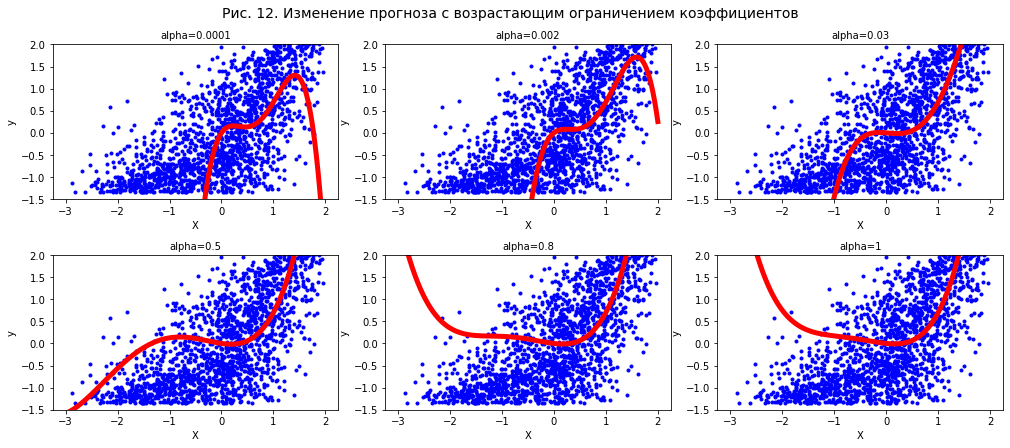

In [280]:
# ВАРИАНТ 1
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
np.random.seed(42)

# с помощью утилиты train_test_split разделим данные на обучающий и тестовый наборы.
from sklearn.model_selection import train_test_split
X = np.array(data['Out_Hum'])
y = np.array(data['Cloudcover'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# готовим 6 графиков для визуализации прогноза с изменением alpha
fig = plt.figure(figsize = (14,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# список значений alpha
alpha_list = [0.0001, 0.002, 0.03, 0.5, 0.8, 1]
for n,i in zip([ni for ni in range(1,len(alpha_list)+1)], alpha_list):
    model = Ridge(i) # модель Ridge-регрессии из sklearn с параметром alpha
    poly_features = PolynomialFeatures(degree=4, include_bias=False) # PolynomialFeatures с степенью 18
    # расширяем полиномиальными признаками данные для обучения
    Х_poly_features = poly_features.fit_transform(X_train.reshape(-1,1))
    # шкалируем расширенные данные для обучения
    X_poly_features_scaled = StandardScaler().fit_transform(Х_poly_features)
    # шкалируем целевую переменную для обучения
    y_scaled = StandardScaler().fit_transform(y_train.reshape(-1,1))
    
    model.fit(X_poly_features_scaled, y_scaled) # обучаем модель Ridge
    
    # проделываем процедуру с данными для проверки (X_new)
    X_new_poly_features = poly_features.fit_transform(X_test.reshape(-1,1)) # расширяем
    X_new_poly_features_scaled = StandardScaler().fit_transform(X_new_poly_features) # шкалируем
    y_pred = model.predict(X_new_poly_features_scaled) # делаем предсказание
    
    # создадим новые данные для отрисовки
    extra_x=np.linspace(-3,2,1000).reshape(-1,1)
    # преобразуем их полиномом 50-й степени
    extra_x_poly = poly_features.transform(extra_x)
    
    
    # рисуем
    ax = fig.add_subplot(2,3,n)
    # все иксы и игреки будем отрисовывать в шкалированном варианте
    ax.plot(StandardScaler().fit_transform(X_train.reshape(-1,1)), y_scaled, "b.", label='X_test', linewidth=1)
    # создадим игреки при помощи найденных коэффициентов: y^ = X * theta^.T
    plt.plot(extra_x, (extra_x_poly).dot(model.coef_.T), "r-", linewidth=5, label="Прогноз degree=50")
    #ax.plot(StandardScaler().fit_transform(X_test), StandardScaler().fit_transform(y_test.reshape(-1,1)), "b.")
    ax.set_title("alpha={}".format(i), fontsize = 10)
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.set_ylim((-1.5, 2))
    fig.suptitle("Рис. 12. Изменение прогноза с возрастающим ограничением коэффициентов", \
            fontsize = 14, y = 1.03)
    
fig.tight_layout()
fig.show()

То же самое - на учебных данных:

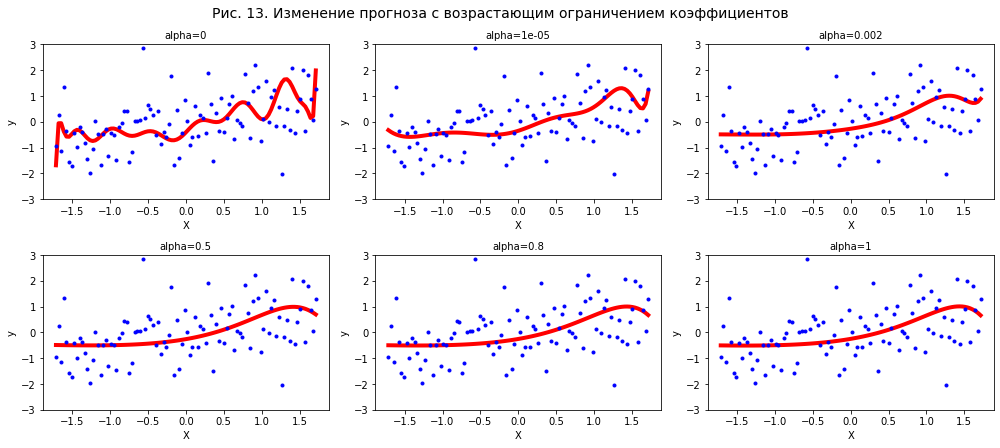

In [281]:
# ВАРИАНТ 1

# создаем данные для обучения модели в количестве m
m=100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
# создаем данные для проверки модели в колиечстве m
X_new = np.linspace(0, 3, m).reshape(m, 1)
y_new =  1 + 0.5 * X_new + np.random.randn(m, 1) / 1.5

# готовим 6 графиков для визуализации прогноза с изменением alpha
fig = plt.figure(figsize = (14,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# список значений alpha
alpha_list = [0, 0.00001, 0.002, 0.5, 0.8, 1]
for n,i in zip([ni for ni in range(1,len(alpha_list)+1)], alpha_list):
    model = Ridge(i) # модель Ridge-регрессии из sklearn с параметром alpha
    poly_features = PolynomialFeatures(degree=18, include_bias=False) # PolynomialFeatures с степенью 18
    # расширяем полиномиальными признаками данные для обучения
    Х_poly_features = poly_features.fit_transform(X)
    # шкалируем расширенные данные для обучения
    X_poly_features_scaled = StandardScaler().fit_transform(Х_poly_features)
    # шкалируем целевую переменную для обучения
    y_scaled = StandardScaler().fit_transform(y)
    
    model.fit(X_poly_features_scaled, y_scaled) # обучаем модель Ridge
    
    # проделываем процедуру с данными для проверки (X_new)
    X_new_poly_features = poly_features.fit_transform(X_new) # расширяем
    X_new_poly_features_scaled = StandardScaler().fit_transform(X_new_poly_features) # шкалируем

    y_pred = model.predict(X_new_poly_features_scaled) # делаем предсказание
    
    # рисуем
    ax = fig.add_subplot(2,3,n)
    # все иксы и игреки будем отрисовывать в шкалированном варианте
    ax.plot(StandardScaler().fit_transform(X_new), y_pred, "r", label='X_new', linewidth=4)
    ax.plot(StandardScaler().fit_transform(X_new), StandardScaler().fit_transform(y_new), "b.")
    ax.set_title("alpha={}".format(i), fontsize = 10)
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.set_ylim((-3, 3))
    fig.suptitle("Рис. 13. Изменение прогноза с возрастающим ограничением коэффициентов", \
            fontsize = 14, y = 1.03)
fig.tight_layout()
fig.show()

`Иллюстрация:` что бывает, когда вначале делаем шкалирование, а затем создание полиномиальных признаков.

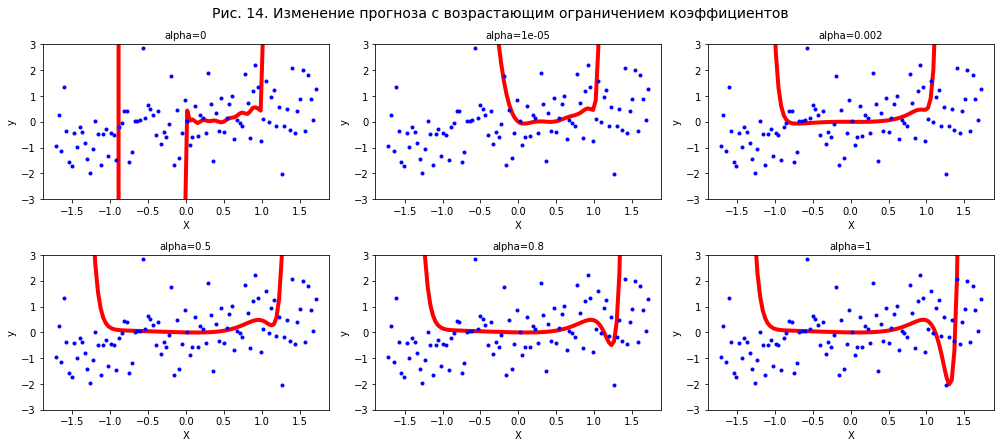

In [282]:
# ВАРИАНТ 2

#np.random.seed(42)

# создаем данные для обучения модели в количестве m
#m=100
#X = 3 * np.random.rand(m, 1)
#y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
# создаем данные для проверки модели в колиечстве m
#X_new = np.linspace(0, 3, m).reshape(m, 1)
#y_new =  1 + 0.5 * X_new + np.random.randn(m, 1) / 1.5

# готовим 6 графиков для визуализации прогноза с изменением alpha
fig = plt.figure(figsize = (14,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# список значений alpha
alpha_list = [0, 0.00001, 0.002, 0.5, 0.8, 1]
for n,i in zip([ni for ni in range(1,len(alpha_list)+1)], alpha_list):
    model = Ridge(i) # модель Ridge-регрессии из sklearn с параметром alpha
    poly_features = PolynomialFeatures(degree=18, include_bias=False) # PolynomialFeatures с степенью 18
    # шкалируем данные для обучения
    X_scaled = StandardScaler().fit_transform(X)
    # расширяем шкалированные данные для обучения
    Х_poly_features_scaled = poly_features.fit_transform(X_scaled)
    # шкалируем целевую переменную для обучения
    y_scaled = StandardScaler().fit_transform(y)
    
    model.fit(X_poly_features_scaled, y_scaled) # обучаем модель Ridge
    
    # проделываем процедуру с данными для проверки (X_new)
    X_new_scaled = StandardScaler().fit_transform(X_new)
    X_new_poly_features_scaled = poly_features.fit_transform(X_new_scaled)

    y_pred = model.predict(X_new_poly_features_scaled)
    
    
    # рисуем
    ax = fig.add_subplot(2,3,n)
    # все иксы и игреки будем отрисовывать в шкалированном варианте
    ax.plot(X_new_scaled, y_pred, "r", label='X_new', linewidth=4)
    ax.plot(X_new_scaled, StandardScaler().fit_transform(y_new), "b.")
    ax.set_title("alpha={}".format(i), fontsize = 10)
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.set_ylim((-3, 3))
    fig.suptitle("Рис. 14. Изменение прогноза с возрастающим ограничением коэффициентов", \
            fontsize = 14, y = 1.03)
fig.tight_layout()
fig.show()

`Вывод:` порядок, в котором мы обрабатываем данные (вначале расширение полиномиальными признаками, затем шкалирование, а не наоборот), __крайне важен!__

Мы также увидели, что увеличение гиперпараметра $\alpha$ "сглаживает" прогнозы модели, делает их более адекватными, позволяет лучше обощать новые данные. 

Как и в случае с линейной регрессией коэффициенты $\theta$ модели мы можем найти как аналитически, так и методом градиентного спуска.

__Аналитическое решение для регуляризованной версии регрессии__ выглядит очень похоже на решение для нерегуляризованной версии, добавляется лишь один компонент $\alpha A$


(23) $$\hat{\theta} = (X^T X \alpha A)^{-1}  X^T y$$

Где:

$\hat{\theta}$ - наилучшее значение $\theta$ (сводит к минимуму функцию потерь);

$X$ - матрица из векторов значений признаков (наблюдений) размера i строк (по числу наблюдений) и j столбцов (по числу коэффициентов для признаков, включая свободный член);

$X^T$ - та же матрица, только транспонированная (строки становятся столбцами);

$\alpha$ - нормировочный параметр, определяет, как сильно мы регуляризуем модель. При $\alpha = 0$ гребневая регрессия становится просто линейной регрессией. При $\alpha$, близкой к 1, наиблучшие из возможных коэффициентов (весов) модели стремятся в ноль;

$A$ - квадратная единичная матрица (по диагонализа исключением самого первого значения единицы, в остальных местах - нули) размера $(m+1)$ * $(m+1)$, где $(m+1)$ - количество  признаков, включая свободный член:

$
\left(\begin{array}{cc} 
0 0 0   \\
0 1 0    \\
0 0 1   \\
\end{array}\right) 
$ 

$y$ - вектор значений целевой переменной из обучающей выборки ("реальных" значений, которых нумеруются от $i$=1 до $i=n$).

In [283]:
# с помощью утилиты train_test_split разделим данные на обучающий и тестовый наборы.
from sklearn.model_selection import train_test_split

X = np.array(data[['Out_Hum', 'Temp_Out']])
y = np.array(data['Cloudcover'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# сразу шкалируем данные, т.к. температура измеряется в градусах (десятки), давление в мм.рт.ст(сотни), облачность в процентах (сотые)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = StandardScaler().fit_transform(y_train.reshape(-1,1))
y_test = StandardScaler().fit_transform(y_test.reshape(-1,1))

''

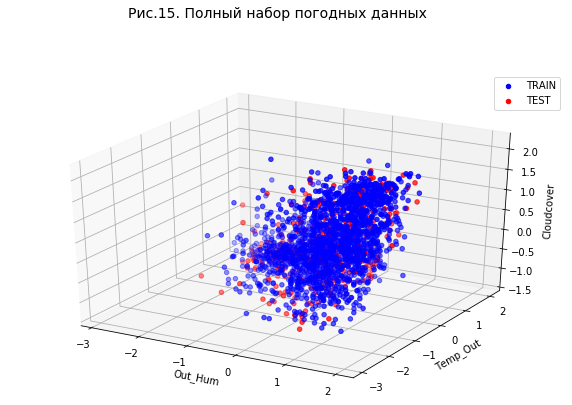

In [284]:
# взглянем еще раз на данные
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0], X_train[:,1], y_train, c='blue', label='TRAIN')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red', label='TEST')
fig.suptitle("Рис.15. Полный набор погодных данных", \
            fontsize = 14, y = 1.03)
ax.set_xlabel('Out_Hum')
ax.set_ylabel('Temp_Out')
ax.set_zlabel('Cloudcover')
ax.legend()
;

In [285]:
# добавляем слева к матрице с наблюдениями столбец с единицами (на 1 будет умножаться параметр тета нулевое)
X_train_with_c = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
theta_best_analytic = np.linalg.inv(X_train_with_c.T.dot(X_train_with_c)).dot(X_train_with_c.T).dot(y_train)
theta_best_analytic

array([[-2.25514052e-16],
       [ 5.91806156e-01],
       [-1.23009102e-01]])

In [286]:
# задаем параметр alpha
alpha = 0.5
# создаем матрицу А
A = np.zeros((theta_best_analytic.shape[0],theta_best_analytic.shape[0]))
for s,c in zip([si for si in range(A.shape[0])], [ci for ci in range(A.shape[1])]):
    A[s,c] = alpha
A[0,0] = 0
A

array([[0. , 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 0.5]])

`Комментарий:` Видим, что коэффициенты Ridge-регрессии отличаются от коэффициентов, полученных из аналитического решения нормального уравнения линейной регрессии. 

In [287]:
theta_best_ridge = np.linalg.inv(X_train_with_c.T.dot(X_train_with_c) + alpha*A).dot(X_train_with_c.T).dot(y_train)
np.round(theta_best_ridge, 6)

array([[-0.      ],
       [ 0.591664],
       [-0.123089]])

In [288]:
np.round(theta_best_analytic, 6)

array([[-0.      ],
       [ 0.591806],
       [-0.123009]])

Теперь можно обученную нашу модель использовать для прогнозов. Сделаем прогноз для test.

In [289]:
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
X_test_with_c[:5,:]

array([[ 1.        ,  1.08381298, -0.81428471],
       [ 1.        ,  0.03875746,  0.72908688],
       [ 1.        , -1.17775249,  1.05980937],
       [ 1.        , -0.12453247,  0.17788274],
       [ 1.        ,  0.66742367,  0.17788274]])

In [290]:
# сделаем прогноз с помощью нашей модели
y_pred = X_test_with_c.dot(theta_best_ridge)
y_pred[:5,:]

array([[ 0.74148294],
       [-0.06681114],
       [-0.82728497],
       [-0.09557682],
       [ 0.37299538]])

In [291]:
"Среднеквадратическая ошибка (MSE) алгоритма собственной реализации составила: {}".\
format(mean_squared_error(y_test, y_pred))

'Среднеквадратическая ошибка (MSE) алгоритма собственной реализации составила: 0.5256148533120216'

Теперь сравним с реализацией sklearn:

In [292]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5, random_state=42)
ridge_reg.fit(X_train, y_train)
;

''

In [293]:
"Среднеквадратическая ошибка (MSE) алгоритма sklearn составила: {}".\
format(mean_squared_error(y_test, ridge_reg.predict(X_test)))

'Среднеквадратическая ошибка (MSE) алгоритма sklearn составила: 0.5256253843246014'

In [294]:
mean_squared_error(y_test, y_pred) - mean_squared_error(y_test, ridge_reg.predict(X_test))

-1.0531012579750865e-05

`Примечание:` собственная и готовая реализация работают с одинаковой RMSE !

### Лассо-регрессия  
#### ($L_1$-регуляризация, регрессия методом наименьшего абсолютного сокращения и выбора, least absolute shrinkage and selection operator regression)

Лассо-регрессия - это другой вид регуляризованных регрессионных моделей, в которой в качестве функции потерь вместо 1/2 квадрата нормы вектора весов $\theta$ (как в случае с гребневой регрессией) используется L1-норма вектора весов $\theta$. 

Функция потерь лассо-регрессии:

(24) $$ J(\theta) = MSE(X,h_\theta) + \alpha \sum_{i=1}^m |\theta_i|$$

Где:

$\alpha$ - нормировочный параметр, определяет, как сильно мы регуляризуем модель. При $\alpha = 0$ лассо-регрессия становится просто линейной регрессией. При $\alpha$, близкой к 1, коэффициенты (веса) модели стремятся в ноль (в первую очередь обнуляются наименее важные признаки).

$\theta_i$ - параметры модели от $\theta_1$ до $\theta_m$. При этом $\theta_0$ (параметр при свободном члене) не регуляризуется. 

`Преимущества`: важной особенностью лассо-регрессии является ее способность занулять коэффициенты ($\theta$) при наименее важных признаках, то есть предоставлять более разреженную (с меньшим количеством коэффициентов) модель. Значение коэффициента дает вклад в функцию потерь довольно большой (берется по модулю), в идеале, чтобы минимизировать такой вклад, было бы неплохо обнулить совсем уж мало влияющие на точность прогноза коэффициенты. В случае с гребневой регрессией, где вклад значения каждого коэффициента в функцию потерь это квадрат коэффициента, бывает достаточно занизить коэффициент, чтобы он стал меньше 1 (т.к. числа от 0 до 1 при возведении в квадрат дают меньшее число).

`Недостатки`: функция потерь лассо-регрессии не дифференцируема в нуле, придется применять градиентный спуск и делать трюк с использованием субградиента.

Функция ошибок с добавлением вектора-субградиента (который мы используем в точках с иксами, равными 0):

(25)

$$
MSE(X,h_\theta) + \alpha
\left(\begin{array}{cc} 
sign (\theta_1) \\
sign (\theta_2) \\
... \\
sign (\theta_n)
\end{array}\right) 
$$ 

Где:

$sign (\theta_i) = \begin{cases} 
\displaystyle -1,  \text{если $\theta_i$ < 0} \\
\displaystyle 0,  \text{если $\theta_i$ = 0} \\
\displaystyle +1, \text{если $\theta_i$ > 0}
\end{cases}$

In [295]:
def gradient_descent(mu, x, y, params, numIterations, lf='MSE', prnt=False):
    """
    Функция реализует алгоритм пакетного градиентного спуска. 
    mu - скорость обучения (learning rate)
    params - количество параметров, включая свободный параметр
    numIterations - количество итераций (int)
    prnt - печатать или нет вычисления, если prnt=True , то на каждом сотом шаге выводится значение функции потерь
    lf - функция потерь (loss function),по умолчанию 'MSE', можно выбрать 'MAE'
    """
    
    n = x.shape[0] #количество наблюдений в выборке
    theta = np.ones(params).reshape(params,1) # [ 1.  1. 1.] - начальные значения коэффициентов пусть будут равны 1
    x_transpose = x.transpose() # транспонированная матрица x
    #print('y', y.shape)
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        #print('h', hypothesis.shape)
        loss = hypothesis - y.reshape(len(y),1) # значение остатка
        #print('l', loss.shape)
        
        if lf=='MSE':
            J = np.sum(loss ** 2) / n  # функция потерь (квадраты)
            if prnt and (iter % 10000)==0:
                print( "iter %s | MSE: %.3f" % (iter, J) )
        
        elif lf=='MAE':
            J = np.sum(abs(loss)) / n  # функция потерь (модули)
            if prnt and (iter % 10000)==0:
                print( "iter %s | MAE: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) * 2 / n         
        theta = theta - mu * gradient  # update
    
    return (theta)

In [296]:
def gradient_descent_with_subgrad(mu, x, y, alpha, params, numIterations, prnt=False):
    """
    Функция реализует алгоритм пакетного градиентного спуска с использованием субградиента при значениях иксов, равных 0. 
    mu - скорость обучения (learning rate)
    alpha - гиперпараметр функции потерь Лассо-регрессии
    params - количество параметров, включая свободный параметр
    numIterations - количество итераций (int)
    prnt - печатать или нет вычисления, если prnt=True , то на каждом сотом шаге выводится значение функции потерь
    """
    
    n = x.shape[0] #количество наблюдений в выборке
    theta = np.ones(params).reshape(params,1) # [ 1.  1. 1.] - начальные значения коэффициентов пусть будут равны 1
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        loss = hypothesis - y.reshape(-1,1) # значение остатка
        
        
        J = np.sum(loss ** 2) / n  + alpha*np.sum(np.abs(theta[1:,:]))# функция потерь (квадраты)
        if prnt and (iter % 10000)==0:
            print( "iter %s | MSE + alpha*sum(abs(theta)): %.3f" % (iter, J) )
        
        if np.sum(theta == 0)>0: # если хотя бы один из параметров theta равен нулю
            gradient = np.dot(x_transpose, loss) * 2 / n # градиент вначале вычисляется как обычно
            # но к градиенту добавляем еще одно слагаемое, чтобы обойти недифференцируемость функции потерь в нулях
            term = (gradient > 0)*np.ones(gradient.shape[0]).reshape(gradient.shape[0],1) + \
            (gradient < 0)*np.ones(gradient.shape[0]).reshape(gradient.shape[0],1)*(-1)
            # добавляем к градиенту это слагаемое
            gradient = gradient + alpha*term.reshape(gradient.shape[0], 1)
        else:
            gradient = np.dot(x_transpose, loss) * 2 / n # в остальных случаях градиент вычисляется как обычно
            
        theta = theta - mu * gradient  # update
    
    return (theta)

In [297]:
# с помощью утилиты train_test_split разделим данные на обучающий и тестовый наборы.
from sklearn.model_selection import train_test_split

X = np.array(data[['Out_Hum', 'Temp_Out']])
y = np.array(data['Cloudcover'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# сразу шкалируем данные, т.к. температура измеряется в градусах (десятки), давление в мм.рт.ст(сотни), облачность в процентах (сотые)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = StandardScaler().fit_transform(y_train.reshape(-1,1))
y_test = StandardScaler().fit_transform(y_test.reshape(-1,1))

In [298]:
%%time
# добавляем слева к матрице с наблюдениями столбец с единицами (на 1 будет умножаться параметр тета нулевое)
X_train_with_c = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
# запускаем алгоритм градиентного спуска
theta_best_lasso = gradient_descent_with_subgrad(0.0001, X_train_with_c, y_train, 0.5, params=X_train_with_c.shape[1], numIterations=100000, prnt=True)

iter 0 | MSE + alpha*sum(abs(theta)): 3.329
iter 10000 | MSE + alpha*sum(abs(theta)): 1.305
iter 20000 | MSE + alpha*sum(abs(theta)): 1.021
iter 30000 | MSE + alpha*sum(abs(theta)): 0.900
iter 40000 | MSE + alpha*sum(abs(theta)): 0.894
iter 50000 | MSE + alpha*sum(abs(theta)): 0.892
iter 60000 | MSE + alpha*sum(abs(theta)): 0.892
iter 70000 | MSE + alpha*sum(abs(theta)): 0.892
iter 80000 | MSE + alpha*sum(abs(theta)): 0.892
iter 90000 | MSE + alpha*sum(abs(theta)): 0.892
Wall time: 8.94 s


In [299]:
np.round(theta_best_lasso, 5)

array([[ 0.     ],
       [ 0.59337],
       [-0.12145]])

Теперь можно обученную нашу модель использовать для прогнозов. Сделаем прогноз для test.

In [300]:
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
X_test_with_c[:5,:]

array([[ 1.        ,  1.08381298, -0.81428471],
       [ 1.        ,  0.03875746,  0.72908688],
       [ 1.        , -1.17775249,  1.05980937],
       [ 1.        , -0.12453247,  0.17788274],
       [ 1.        ,  0.66742367,  0.17788274]])

In [301]:
# сделаем прогноз с помощью нашей модели
y_pred = X_test_with_c.dot(theta_best_lasso)
y_pred[:5,:]

array([[ 0.74199237],
       [-0.0655488 ],
       [-0.82755148],
       [-0.095497  ],
       [ 0.37442379]])

In [302]:
mean_squared_error(y_test, y_pred)

0.5254486822976137

Сравним с реализацией в sklearn

In [303]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X_train, y_train)
mean_squared_error(y_test, lasso_reg.predict(X_test))

0.7872624303852906

`Вопрос:` почему в случае реализации самописным алгоритмом результат получается точнее?

`Возможный ответ:` в реализации sklearn используется подход coordinate descent. Возможно, на наших данных использование субградиента эффективнее.

#### Применение лассо-регрессии для агрегированных погодных данных по годам для прогнозирования уроажйности (набор данных с малым количеством наблюдений)

In [304]:
# Импортируем необходимые инструменты
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
from scipy import stats
from dateutil import parser
import re
import random
from collections import Counter
import time
from datetime import timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import requests
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
#from datetime import datetime, date, time
from pygal.table import Table
from lxml.html import builder, tostring

In [305]:
# прочитаем датафрейм из файла
result_df = pd.read_excel("result_df_1.xlsx")
result_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True) # номер года пусть тоже будет фичей
result_df

,Date,Bar_mean_1,Temp_Out_mean_1,Out_Hum_mean_1,Wind_Speed_mean_1,Wind_Chill_mean_1,Dew_Pt_mean_1,Heat_Index_mean_1,Hi_Temp_mean_1,Hi_Speed_mean_1,...,Wind_Dir_mode_8_ENE,Wind_Dir_mode_8_ESE,Wind_Dir_mode_9_ESE,Wind_Dir_mode_9_SE,Wind_Dir_mode_9_W,Wind_Dir_mode_10_ENE,Wind_Dir_mode_10_ESE,Wind_Dir_mode_10_W,Wind_Dir_mode_11_W,Wind_Dir_mode_11_WNW
0,2014,762.411525,12.111111,70.847222,4.324846,10.708333,6.569444,12.180556,17.111111,6.080247,...,0,1,0,0,1,0,0,1,0,0
1,2015,762.328125,10.333333,60.222222,5.219907,8.000000,2.333333,10.375000,16.222222,7.037037,...,0,0,1,0,0,0,0,1,1,0
2,2016,759.596775,13.000000,64.736111,5.455247,11.569444,6.180556,13.194444,18.111111,7.746914,...,1,0,0,1,0,0,0,0,0,0
3,2017,764.256750,9.111111,71.402778,6.338735,6.305556,4.000000,9.263889,14.555556,9.259259,...,0,1,0,0,1,0,0,1,0,1
4,2018,760.743525,13.555556,66.569444,4.490741,12.361111,7.055556,13.736111,18.444444,6.265432,...,0,0,0,0,0,0,1,0,1,0
5,2019,767.165325,13.888889,58.263889,4.054784,10.625000,3.916667,12.333333,17.777778,5.740741,...,0,0,0,0,0,1,0,0,1,0


In [306]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 241 entries, Date to Wind_Dir_mode_11_WNW
dtypes: float64(181), int64(60)
memory usage: 11.4 KB


Разделим данные на тренировочную и тестовыю выборки.

In [307]:
X_train = result_df[(set(result_df.columns) - set(['yield_value']))].iloc[:-2,:]
X_test = result_df[(set(result_df.columns) - set(['yield_value']))].iloc[-2:,:]
y_train = result_df['yield_value'].iloc[:-2]
y_test = result_df['yield_value'].iloc[-2:]

In [308]:
y_train

0    5.000000
1    4.500000
2    9.500000
3    6.397731
Name: yield_value, dtype: float64

Обучим модель на первых 4 годах наблюдений.

In [309]:
lasso_ = Lasso(alpha=0.5)
lasso_.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Делаем прогноз:

In [310]:
lasso_.predict(X_test)

array([5.99454262, 5.60705996])

Сравниваем с реальными значениями:

In [311]:
y_test

4    4.0
5    6.4
Name: yield_value, dtype: float64

Модель сильно промахивается:

In [312]:
mean_squared_error(y_test, lasso_.predict(X_test))

2.303477091129001

Может быть перекрестная проверка даст представление о масштабе проблемы:

In [313]:
X_ = result_df[(set(result_df.columns) - set(['yield_value']))]
y_ = result_df['yield_value']

from sklearn.model_selection import cross_val_score
lasso_ = Lasso(alpha=0.5)
cross_val_score(lasso_, X_, y_, cv=3)

array([-55.69188699,  -4.03218848,  -0.59963687])

`Вывод:` ошибка модели очень сильно скачет при разных выборках. Размер выборки мал, модель переобучена, требуется бОльшая история наблюдений.

### Эластичная сеть

Эластичная сеть - это комбинация гребневой и лассо-регрессии. 
Функция потерь эластичной сети:

(26) $$ J(\theta) = MSE(X,h_\theta) + r\alpha \sum_{i=1}^m |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^m \theta_i ^2$$

Где:

$r$ - гиперпараметр, который управляет пропорцией между L2 и L1 регуляризацией.
При $r = 0$ эластичная сеть становится просто гребневой регрессией, а при $r=1$ становится лассо-регрессией.

Реализуем собственный алгоритм:

In [314]:
def gradient_descent_with_subgrad_for_elastic_net(mu, x, y, alpha, r, params, numIterations, prnt=False):
    """
    Функция реализует алгоритм пакетного градиентного спуска с использованием субградиента при значениях иксов, равных 0. 
    mu - скорость обучения (learning rate)
    alpha - гиперпараметр функции потерь Лассо-регрессии
    params - количество параметров, включая свободный параметр
    numIterations - количество итераций (int)
    prnt - печатать или нет вычисления, если prnt=True , то на каждом сотом шаге выводится значение функции потерь
    """
    
    n = x.shape[0] #количество наблюдений в выборке
    theta = np.ones(params).reshape(params,1) # [ 1.  1. 1.] - начальные значения коэффициентов пусть будут равны 1
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        loss = hypothesis - y.reshape(-1,1) # значение остатка
        
        J = np.sum(loss ** 2) / n  + r*alpha*np.sum(np.abs(theta[1:,:])) + (1-r)/2 * alpha*np.sum(theta[1:,:]**2)
        if prnt and (iter % 10000)==0:
            print( "iter %s | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): %.3f" % (iter, J) )
        
        if np.sum(theta == 0)>0: # если хотя бы один из параметров theta равен нулю
            gradient = np.dot(x_transpose, loss) * 2 / n # градиент вначале вычисляется как обычно
            # но к градиенту добавляем еще одно слагаемое, чтобы обойти недифференцируемость функции потерь в нулях
            term = (gradient > 0)*np.ones(gradient.shape[0]).reshape(gradient.shape[0],1) + \
            (gradient < 0)*np.ones(gradient.shape[0]).reshape(gradient.shape[0],1)*(-1)
            # добавляем к градиенту это слагаемое
            gradient = gradient + alpha*term.reshape(gradient.shape[0], 1)
        else:
            gradient = np.dot(x_transpose, loss) * 2 / n # в остальных случаях градиент вычисляется как обычно
            
        theta = theta - mu * gradient  # update
    
    return (theta)

In [315]:
# с помощью утилиты train_test_split разделим данные на обучающий и тестовый наборы.
from sklearn.model_selection import train_test_split

X = np.array(data[['Out_Hum', 'Temp_Out']])
y = np.array(data['Cloudcover'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# сразу шкалируем данные, т.к. температура измеряется в градусах (десятки), давление в мм.рт.ст(сотни), облачность в процентах (сотые)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = StandardScaler().fit_transform(y_train.reshape(-1,1))
y_test = StandardScaler().fit_transform(y_test.reshape(-1,1))

In [316]:
%%time
# добавляем слева к матрице с наблюдениями столбец с единицами (на 1 будет умножаться параметр тета нулевое)
X_train_with_c = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
# запускаем алгоритм градиентного спуска
theta_best_enet = gradient_descent_with_subgrad_for_elastic_net(0.0001, X_train_with_c, y_train, 0.5, 0.5, params=X_train_with_c.shape[1], numIterations=100000, prnt=True)

iter 0 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 3.079
iter 10000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 1.116
iter 20000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.877
iter 30000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.785
iter 40000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.770
iter 50000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.764
iter 60000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.761
iter 70000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.760
iter 80000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.759
iter 90000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.759
Wall time: 7.26 s


In [317]:
np.round(theta_best_enet, 5)

array([[ 0.     ],
       [ 0.59337],
       [-0.12145]])

In [318]:
#возьмем тестовые данные
# добавим слева вектор-столбец с единицами
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
X_test_with_c[:5,:]

array([[ 1.        ,  1.08381298, -0.81428471],
       [ 1.        ,  0.03875746,  0.72908688],
       [ 1.        , -1.17775249,  1.05980937],
       [ 1.        , -0.12453247,  0.17788274],
       [ 1.        ,  0.66742367,  0.17788274]])

In [319]:
# сделаем прогноз с помощью нашей модели
y_pred = X_test_with_c.dot(theta_best_enet)
y_pred[:5,:]

array([[ 0.74199237],
       [-0.0655488 ],
       [-0.82755148],
       [-0.095497  ],
       [ 0.37442379]])

In [320]:
mean_squared_error(y_test, y_pred)

0.5254486822976137

Сравним с реализацией в sklearn

In [321]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)
mean_squared_error(y_test, elastic_net.predict(X_test))

0.6405848357257594

`Вопрос:` почему в случае реализации самописным алгоритмом результат получается точнее?

`Возможный ответ:` в реализации sklearn используется подход coordinate descent. Возможно, на наших данных использование субградиента эффективнее.

## Выводы:

#### Достижение целей проектной работы:

1. Изучение наиболее известных регрессионных моделей, применяемых для прогнозирования (сравнение результатов, определение преимуществ и недостатков моделей). __Достигнуто.__

2. Сбор и подготовка реальных погодных данных (предикторы) и данных об урожайности с/х культур (целевая переменная) для изучения. __Достигнуто.__

3. Применение регрессионных моделей на реальных данных для прогнозирования урожайности с/х культур. __Достигнуто частично.__

##### Выполнение задач проектной работы:

1. Изучить и реализовать на практике следующие регрессионные модели:

 - Линейная регрессия. __Выполнено.__
 
 - Полиномиальная регрессия. __Выполнено.__
 
 - Ridge-регрессия. __Выполнено.__
 
 - Lasso-регрессия. __Выполнено.__
 
 - Эластичная сеть. __Выполнено.__
 

2. Изучить и применить методы оптимизации:

 - Аналитические решения. __Выполнено.__

 - Градиентный спуск:

    - пакетный. __Выполнено.__

    - стохастический. __Выполнено.__
    
    - мини-пакетный. __Выполнено.__
    

3. Собрать и подготовить погодные данные, решить проблему сопоставимости (идентичная информация в разных источниках обозначена разными названиями, зачастую измерения проведены в разных единицах) и неполноты данных (отсутствуют данные за длительные периоды) следующими способами:

 - Обработка предоставленных заказчиком данных (работа с пропущенными значениями, агрегирование показателей по периодам). __Выполнено.__

 - Обогащение погодных данных данными, полученными по API из открытых источников. __Выполнено.__

 - Проектирование признаков, действующих на разных фазах роста с/х культуры. __Выполнено.__

##### Какие полезные практические выводы получил:

1. __Строить регрессионную модель на малом количестве наблюдений скорее всего бессмысленно, т.к. значение ошибки будет нестабильно, модель будет переобучена на небольшой выборке данных.__

2. __Линейная регрессия__:

 - ___Плюсы___:
    - простая в реализации и интерпретации модель;
    - не требуется длительного обучения;
    - можно проверить полученные коэффициенты теоремой Гаусса-Маркова;
    - можно найти коэффициенты аналитически.
 
 - ___Минусы___: 
    - аналитическое решение при большом количестве признаков становится вычислительно дорогим: $O(n^3)$;
    - может быть малоэффективная для данных, распределенных нелинейно.
    
 - ___Сравнение собственной реализации и реализации из sklearn:___
    - аналитическое решение дает почти одинаковый результат. разница - в 15-м знаке после запятой. Вероятно, это связано с особенностями работы библиотеки с матрицами.
    
3. __Полиномиальная регрессия__:

 - ___Плюсы___:
    - все плюсы линейной регрессии, т.к. последняя - частный случай полиномиальной регрессии;
    - можно аппроксимировать данные, которые распределены нелинейно.
 
 - ___Минусы___: 
    - взрывной рост количества коэффициентов с ростом числа первоначальных признаков и степени аппроксимирующего  полинома;
    - степень аппроксимирующего  полинома нужно подбирать.
 - ___Особенности___:
    - важно соблюдать порядок подготовки данных перед обучением и применением модели: сначала получаем новые полиномиальные признаки, только затем делаем шкалирование.
 
 - ___Сравнение собственной реализации и реализации из sklearn:___
    - реализованный мной алгоритм рассчитан только на применение аппроксимирующего полинома 2-1 степени. С теми же параметрами sklearn дает идентичный результат.
    
4. __Ridge-регрессия__:


 - ___Плюсы___:
    - все плюсы регуляризованных регрессионных моделей;
    - дает более адекватную модель, способную к обобщению (снижается переобучение).
 
 - ___Особенности___: 
    - свободный член регуляризуется отдельно от остальных $\theta$;
    - коэффициент 1/2 перед $\alpha$ не обязателен, можно просто более аккуратно подбирать $\alpha$;
    - регуляризованную функцию потерь нужно использовать только на обучении, при тестировании уже используется не регуляризованная функция потерь.
    
 - ___Сравнение собственной реализации и реализации из sklearn:___
    - собственный алгоритм и метод из sklearn показал идентичные результаты.
    
5. __Lasso-регрессия__:

 - ___Плюсы___:
    - все плюсы регуляризованных регрессионных моделей;
    - дает более адекватную модель, способную к обобщению (снижается переобучение);
    - способность занулять коэффициенты ($\theta$) при наименее важных признаках, то есть предоставлять более разреженную (с меньшим количеством коэффициентов) модель. Значение коэффициента дает вклад в функцию потерь довольно большой (берется по модулю), в идеале, чтобы минимизировать такой вклад, было бы неплохо обнулить совсем уж мало влияющие на точность прогноза коэффициенты. В случае с гребневой регрессией, где вклад значения каждого коэффициента в функцию потерь это квадрат коэффициента, бывает достаточно занизить коэффициент, чтобы он стал меньше 1 (т.к. числа от 0 до 1 при возведении в квадрат дают меньшее число). В случае с лассо-регрессией этого может быть недостаточно.
    
 - ___Минусы___:
    - функция потерь лассо-регрессии не дифференцируема в нуле, придется применять градиентный спуск и делать трюк с использованием субградиента.
 
 - ___Особенности___: 
    - свободный член регуляризуется отдельно от остальных $\theta$.
    
 - ___Сравнение собственной реализации и реализации из sklearn:___
    - собственный алгоритм показал меньшую ошибку, чем метод из sklearn.
    
6. __Эластичная сеть__:

 - ___Плюсы___:
    - совмещает в себе плюсы лассо- и ридж-регрессии, можно выбирать пропорцию "лассовости" и "риджности".
    
 - ___Минусы___:
    - функция потерь эластичной сети не дифференцируема в нуле, придется применять градиентный спуск и делать трюк с использованием субградиента;
    - нет рецепта для выбора лучшего гиперпараметра $r$, его придется подбирать перебором. 
 
 - ___Особенности___: 
    - свободный член регуляризуется отдельно от остальных $\theta$.

7. __Пакетный градиентный спуск__:

 - ___Плюсы___:
    - метод вычислительно не так чувствителен к количеству признаков, как аналитическое решение;
    - может применяться для минимизации функции потерь не только линейной регрессии, но и других моделей, включая нейронные сети.

 - ___Минусы___:
    - нет четкого правила для подбора скорости обучения;
    - метод чувствителен к разнице в масштабах признаков;
    - при попадании в локальный минимум шансов выбраться из него очень мало.
 - ___Особенности___:
    - для ускорения сходимости алгоритма рекомендуется шкалировать данные (привести к одному масштабу).
    
8. __Стохастический градиентный спуск__:

 - ___Плюсы___:
    - все плюсы пакетного градиентного спуска;
    - работает быстрее, вычислительно дешевле, чем пакетный градиентный спуск;
    - больше шансов, чем у пакетного градиентного спуска, выбраться из локального минимума.

 - ___Минусы___:
    - все минусы пакетного градиентного спуска, кроме способности выбираться из локальных минимумов.
 - ___Особенности___:
    - те же, что и для пакетного градиентного спуска;
    - результат получается "хороший", но не лучший.
 - ___Сравнение собственной реализации и реализации из sklearn:___
    - собственная реализация работает быстрее, чем собственная реализация пакетного варианта, но медленне, чем sklearn. Результат нашего алгоритма оказался намного хуже, чем у метода из sklearn.

9. __Мини-пакетный градиентный спуск__:

 - ___Плюсы___:
    - совмещает в себе плюсы пакетного и стохастического градиентного спуска;
    - более уверенно движется к минимуму, чем стохастический вариант.

 - ___Минусы___:
    - все минусы пакетного градиентного спуска.
 - ___Особенности___:
    - те же, что и для пакетного градиентного спуска;
    - результат получается "хороший", но не лучший.

10. __Теорему Гаусса-Маркова можно применять только для линейной регрессии, поэтому всегда есть смысл подумать, можно ли свести модель к линейной (полиномиальной) регрессии.__

12. __Анализ кривых обучения может быть очень полезен. Недообученные модели рекомендуется усложнить, переобученные - обучить на большем количестве обучающих примеров.__

__Список источников:__

Литература:

1. Жерон О. Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow: концепции, инструменты и техники для создания интеллектуальных систем.: Пер. с англ. - СПб.: ООО "Диалектика", 2019. - 688 с.
2. Вандер Плас Дж. Python для сложных задач: наука о данных и машинное обучение. - СПб.: Питер, 2018. - 576 с.


Ссылки по агро-тематике:
    
1. Сайт производителя измерительного оборудования (датчиков):
https://www.davisinstruments.com/

API:
https://www.davisinstruments.com/support/weather/download/VantageSerialProtocolDocs_v261.pdf

2. Сервис, в котором агрегируются данные с датчиков:
https://www.weatherlink.com/

Карта расположения станций:
https://www.weatherlink.com/map/2c594985-a2a4-4e41-8f86-efbe6078d455

3. Открытый сервис, предоставляющий погодные данные:

API: https://www.worldweatheronline.com/developer/api/docs/historical-weather-api.aspx#hourly_element

4. Дополнительные источники информации:

https://geo.bsu.by/images/pres/oz/fian/fian_3.pdf

https://ru.wikipedia.org/wiki/Сумма_активных_температур

https://www.dissercat.com/content/prognozirovanie-urozhainosti-zernovykh-kultur-na-srednesrochnyi-period/read

http://ea.donntu.org:8080/bitstream/123456789/29679/1/Kussul.pdf

https://research-journal.org/economical/modelirovanie-urozhajnosti-selskoxozyajstvennyx-kultur/

https://cyberleninka.ru/article/n/prognozirovanie-proizvodstva-i-urozhaynosti-zernovyh-kultur-na-osnove-regressionnyh-modeley/viewer

http://skp23.ru/cultivation7.html

https://npobiocentr.ru/stati/statya-5/